<a href="https://colab.research.google.com/github/jmcord/GANs/blob/master/Churn_na_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sdv.single_table.ctgan import CTGAN
from sdv.sampling import Condition
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [1]:
!pip install sdv
!pip install table_evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.3/123.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.1/145.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 7.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dython to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
try:
    from google.colab import drive

    drive.mount("/content/drive", force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
total_missing_values = dataset.isna().sum().sum()

print("Total missing values:", total_missing_values)

NameError: ignored

In [3]:
#Load example dataset from manu different synthetic distributions
dataset = pd.read_csv('/content/drive/MyDrive/ctgan/churn_na_test.csv', sep=',', index_col=[0],decimal='.')
dataset.head()

id  nfamilias_vinc  nfamilias_vinc_hace4  nfamilias_vinc_n6_hace2  \
1  456366.0               4                     4                        4   
2  477691.0               4                     4                        4   
3  461769.0               7                     7                        7   
4  481702.0               4                     4                        4   
5  484257.0               6                     6                        6   

   nfamilias_vinc_n6_hace4  nfamilias_vinc_hace13  nfamilias_vinc_n6_hace13  \
1                        4                      4                         4   
2                        4                      3                         3   
3                        7                      7                         7   
4                        4                      4                         4   
5                        6                      6                         6   

   maturidade_ch_carteira  d_0_v_spm_ch_hace_1y2  n_ch_carteira_hace4  ...  \
1                       0               0.000000                    0  ...   
2                       0               0.000000                    0  ...   
3                     481              -0.003486                    2  ...   
4                       0               0.000000                    0  ...   
5                       0               0.000000                    0  ...   

   d_0_v_spm_ch_hace_1y4  montante_total_ch_carteira_hace7  v_smm_ch_hace7  \
1               0.000000                               0.0            0.00   
2               0.000000                               0.0            0.00   
3              -0.010385                          170000.0        91240.62   
4               0.000000                               0.0            0.00   
5               0.000000                               0.0            0.00   

   vmargemf_vact_hace2  vmargemf_vact_hace4  taxa_media_ch_carteira  \
1             0.000000             0.000000                0.000000   
2             0.011386             0.006713                0.000000   
3             0.002556             0.001508                4.824118   
4             0.000000             0.000000                0.000000   
5             0.040780             0.023869                0.000000   

   vrec_vact_hace2  d_0_v_smm_ch_hace_1y7  d_0_vact_hace_1y2  target  
1         0.000000               0.000000           0.000000       0  
2         0.361655               0.000000          -0.018459       0  
3         0.831615              -0.020529          -0.003478       0  
4         0.000000               0.000000           0.000000       0  
5        11.457745               0.000000          -0.025379       0  

[5 rows x 21 columns]

In [ ]:
#Reduce dataset length
import random
test_size = 0.1
num_test_samples = int(len(dataset) * test_size)
test_indices = random.sample(range(len(dataset)), num_test_samples)
dataset = dataset.iloc[test_indices,:]
len(dataset)

35429

In [5]:
#Instantiate and fit the CTGAN model
ctgan = CTGAN(epochs=300, verbose = 2)
ctgan.fit(dataset)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


KeyboardInterrupt: ignored

In [6]:
ctgan.save('/content/drive/MyDrive/ctgan/churn_na_all_300.pkl')

#Cargar este

In [ ]:
#ctgan = CTGAN.load('/content/drive/MyDrive/ctgan/credit_card_all_500.pkl')

In [4]:
ctgan = CTGAN.load('/content/drive/MyDrive/ctgan/churn_na_all_300.pkl')

In [5]:
#Generate synthetic data
synthetic_dataset = ctgan.sample(300000)

In [ ]:
synthetic_dataset.head()

In [ ]:
#Save
#synthetic_dataset.to_csv('/content/drive/MyDrive/ctgan/synthetic_data_bank.csv', index = False)

In [ ]:
#Save
synthetic_dataset.to_csv('/content/drive/MyDrive/ctgan/synthetic_credit_card_500.csv', index = False)

In [ ]:
#Load synthetic dataset dataset from manu different synthetic distributions
synthetic_dataset = pd.read_csv('/content/drive/MyDrive/ctgan/synthetic_data_bank.csv', sep=',',decimal='.')
synthetic_dataset.head()

age  job.admin.  job.blue.collar  job.entrepreneur  job.housemaid  \
0   40           0                0                 0              0   
1   35           0                0                 0              0   
2   45           0                0                 0              0   
3   41           0                1                 0              0   
4   29           0                1                 0              0   

   job.management  job.retired  job.self.employed  job.services  job.student  \
0               1            0                  0             0            0   
1               1            0                  0             0            0   
2               0            0                  0             0            0   
3               1            0                  0             0            0   
4               0            0                  0             0            0   

   ...  contact.unknown  duration  campaign  pdays  previous  \
0  ...                0       314         1      1         0   
1  ...                0       137         1      0         0   
2  ...                0       238         1      0         1   
3  ...                1        79         1      0         0   
4  ...                1      1637         6      1         0   

   poutcome.failure  poutcome.other  poutcome.success  poutcome.unknown  \
0                 0               0                 0                 1   
1                 0               0                 0                 1   
2                 0               0                 0                 1   
3                 0               0                 0                 1   
4                 0               0                 0                 1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 39 columns]

In [8]:
#Visualize and assess
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(dataset, synthetic_dataset)
#table_evaluator.visual_evaluation()

In [ ]:
for col in dataset.columns:
  print(col)
  table_evaluator.evaluate(col)

id


In [6]:
def qqplot(df1,df2,xlim,ylim,namecolumn):
    data_r = df1.loc[:, namecolumn].values
    data_f = df2.loc[:, namecolumn].values

    df_pct = pd.DataFrame()
    df_pct[namecolumn + '_real'] = np.percentile(data_r, range(100))
    df_pct[namecolumn + '_fake'] = np.percentile(data_f, range(100))
    #plt(figsize=(8, 8))
    plt.scatter(x=namecolumn + '_real', y=namecolumn + '_fake', data=df_pct, label='Actual fit')
    sns.lineplot(x=namecolumn + '_real', y=namecolumn + '_fake', data=df_pct, color='r', label='Line of perfect fit')
    sns.lineplot(x=[0,10000], y=[0,10000], color='r')
    plt.xlabel('Quantile of '+namecolumn + '_real')
    plt.ylabel('Quantile of '+namecolumn + 'fake')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.title("QQ plot")

Text(0.5, 1.0, 'QQ plot')

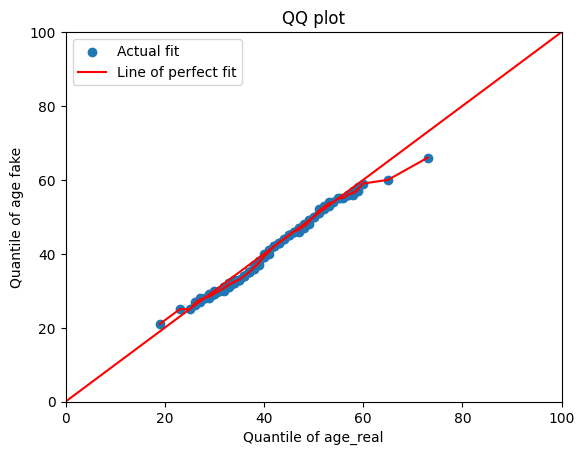

In [ ]:
#age QQplot
age_r = dataset.loc[:, 'age'].values
age_f = synthetic_dataset.loc[:, 'age'].values

df_pct = pd.DataFrame()
df_pct['age_real'] = np.percentile(age_r, range(100))
df_pct['age_fake'] = np.percentile(age_f, range(100))
#plt(figsize=(8, 8))
plt.scatter(x='age_real', y='age_fake', data=df_pct, label='Actual fit')
sns.lineplot(x='age_real', y='age_fake', data=df_pct, color='r', label='Line of perfect fit')
sns.lineplot(x=[0,100], y=[0,100], color='r')
plt.xlabel('Quantile of age_real')
plt.ylabel('Quantile of age fake')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()
plt.title("QQ plot")

Text(0.5, 1.0, 'QQ plot')

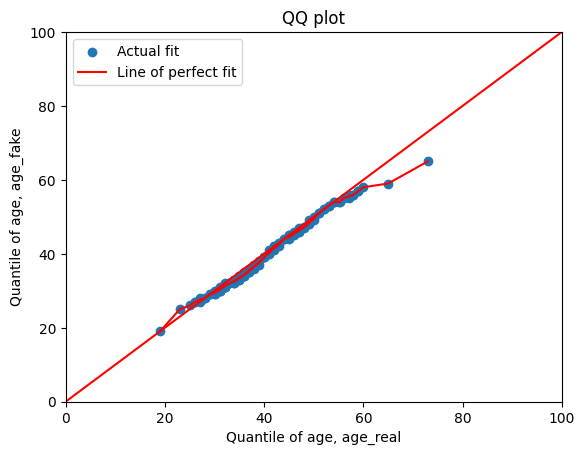

In [ ]:
#plt(figsize=(8, 8))
plt.scatter(x='age_real', y='age_fake', data=df_pct, label='Actual fit')
sns.lineplot(x='age_real', y='age_fake', data=df_pct, color='r', label='Line of perfect fit')
sns.lineplot(x=[0,100], y=[0,100], color='r')
plt.xlabel('Quantile of age, age_real')
plt.ylabel('Quantile of age, age_fake')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()
plt.title("QQ plot")

In [ ]:
#duration QQplot
age_r = dataset.loc[:, 'duration'].values
age_f = synthetic_dataset.loc[:, 'duration'].values

df_pct = pd.DataFrame()
df_pct['duration_real'] = np.percentile(age_r, range(100))
df_pct['duration_fake'] = np.percentile(age_f, range(100))

Text(0.5, 1.0, 'QQ plot')

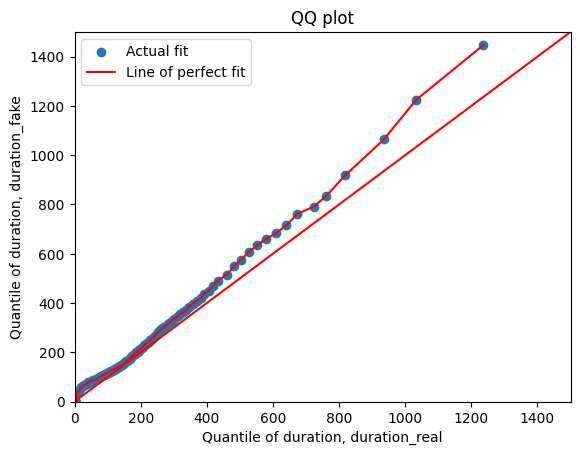

In [ ]:
#plt(figsize=(8, 8))
plt.scatter(x='duration_real', y='duration_fake', data=df_pct, label='Actual fit')
sns.lineplot(x='duration_real', y='duration_fake', data=df_pct, color='r', label='Line of perfect fit')
sns.lineplot(x=[0,1500], y=[0,1500], color='r')
plt.xlabel('Quantile of duration, duration_real')
plt.ylabel('Quantile of duration, duration_fake')
plt.xlim(0,1500)
plt.ylim(0,1500)
plt.legend()
plt.title("QQ plot")

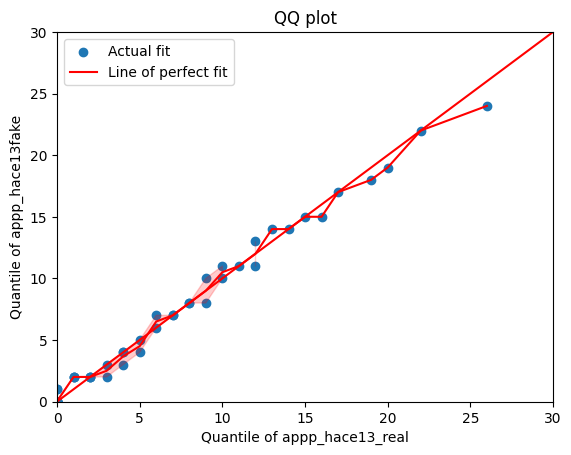

In [ ]:
qqplot(dataset, synthetic_dataset, [0,30], [0,30], 'appp_hace13')

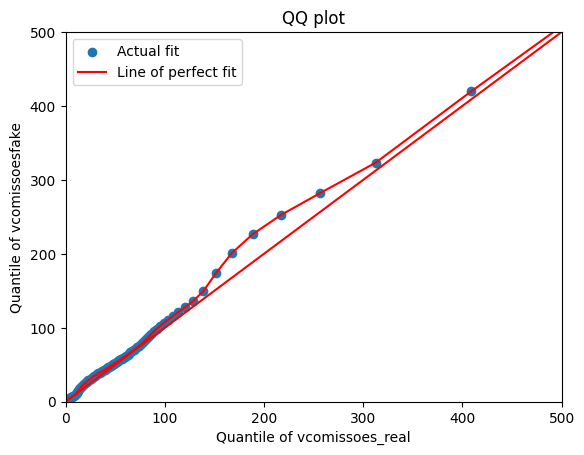

In [ ]:
qqplot(dataset, synthetic_dataset, [0,500], [0,500], 'vcomissoes')

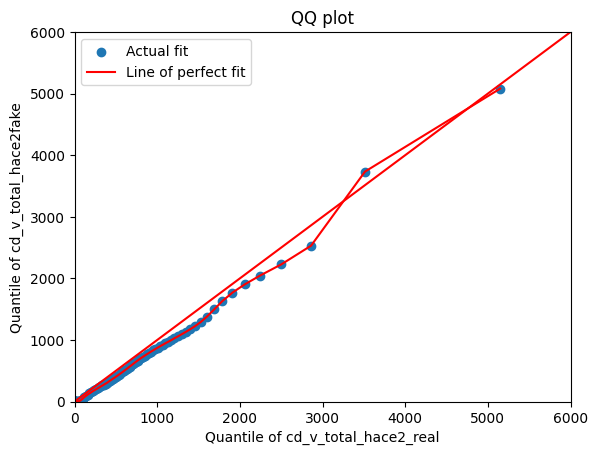

In [ ]:
qqplot(dataset, synthetic_dataset, [0,6000], [0,6000], 'cd_v_total_hace2')

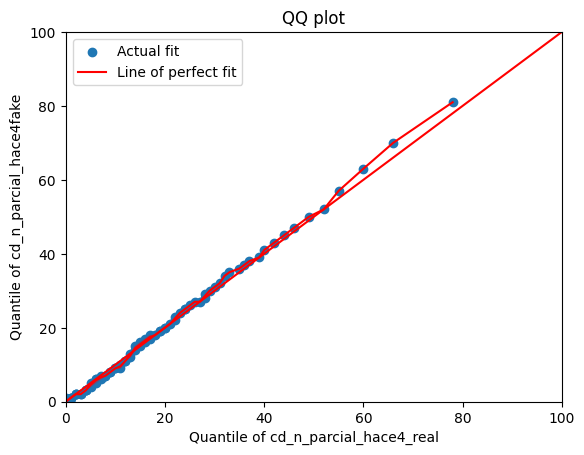

In [ ]:
qqplot(dataset, synthetic_dataset, [0,100], [0,100], 'cd_n_parcial_hace4')

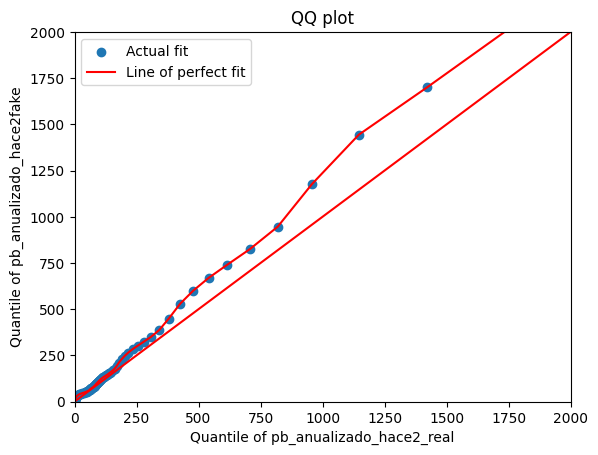

In [ ]:
qqplot(dataset, synthetic_dataset, [0,2000], [0,2000], 'pb_anualizado_hace2')

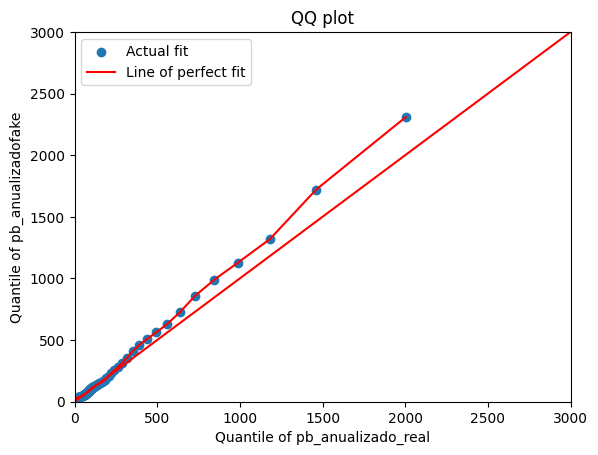

In [ ]:
qqplot(dataset, synthetic_dataset, [0,3000], [0,3000], 'pb_anualizado')

In [ ]:
#Similarity metric
table_evaluator.evaluate(target_col='age')

/usr/local/lib/python3.10/dist-packages/table_evaluator/metrics.py:95: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(
/usr/local/lib/python3.10/dist-packages/table_evaluator/metrics.py:121: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0267   0.0500              0.0195
DecisionTreeClassifier_real   0.0433   0.0383              0.0187
LogisticRegression_fake       0.0283   0.0517              0.0309
LogisticRegression_real       0.0400   0.0383              0.0204
MLPClassifier_fake            0.0300   0.0400              0.0076
MLPClassifier_real            0.0400   0.0200              0.0093
RandomForestClassifier_fake   0.0367   0.0550              0.0152
RandomForestClassifier_real   0.0467   0.0433              0.0161

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.5540
nearest neighbor std                     0.6858

Miscellaneous results:
                                  Result
Column Cor

#KS


In [6]:
from scipy.stats import ks_2samp

In [7]:
for col in dataset.columns:
  print(str(col))
  print()
  print(ks_2samp(dataset[str(col)], synthetic_dataset[str(col)]))

id

KstestResult(statistic=0.033704670253911106, pvalue=2.149295116718718e-96, statistic_location=291347.0, statistic_sign=1)
nfamilias_vinc

KstestResult(statistic=0.03300080601767208, pvalue=1.992916416138606e-92, statistic_location=4, statistic_sign=1)
nfamilias_vinc_hace4

KstestResult(statistic=0.011542526574112054, pvalue=1.1122173817938785e-11, statistic_location=3, statistic_sign=1)
nfamilias_vinc_n6_hace2

KstestResult(statistic=0.013909244477196204, pvalue=9.081394750277957e-17, statistic_location=3, statistic_sign=1)
nfamilias_vinc_n6_hace4

KstestResult(statistic=0.03796453478213513, pvalue=3.4184866558877725e-122, statistic_location=5, statistic_sign=1)
nfamilias_vinc_hace13

KstestResult(statistic=0.03164211703037345, pvalue=5.253831435928825e-85, statistic_location=6, statistic_sign=1)
nfamilias_vinc_n6_hace13

KstestResult(statistic=0.024789355593714424, pvalue=2.4642213273538013e-52, statistic_location=7, statistic_sign=-1)
maturidade_ch_carteira

KstestResult(statisti

#PSI

In [ ]:
def calculate_psi(expected, actual, bins=10):
    # Create bins for the data
    bins = np.percentile(expected, np.linspace(0, 100, bins+1))

    # Calculate expected and actual proportions in each bin
    expected_counts = np.histogram(expected, bins=bins)[0]
    actual_counts = np.histogram(actual, bins=bins)[0]

    # Calculate expected and actual proportions
    expected_proportions = expected_counts / len(expected)
    actual_proportions = actual_counts / len(actual)

    # Calculate PSI for each bin
    psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)

    # Sum PSI for all bins to get the overall PSI score
    total_psi = np.sum(psi)

    if not str(total_psi).isdigit():
      N_actual = len(actual[col])
      N_expected = len(expected[col])
      expected_pct = []
      actual_pct = []
      for label in expected[col].unique():

        expected_label_counts = (expected[col]== label).sum()
        expected_label_pct = expected_label_counts*100/N_expected
        expected_pct.append(expected_label_pct)


        actual_label_counts = (actual[col]== label).sum()
        actual_label_pct = actual_label_counts*100/N_actual
        actual_pct.append(actual_label_pct)


      psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)
      total_psi = np.sum(psi)

    return total_psi


In [ ]:
for col in dataset.columns:
  print(col)
  print()
  print(calculate_psi(dataset, synthetic_dataset))

age

6.4129747269967865
job.admin.

2.4153510775219873
job.blue.collar

0.2350532408245673
job.entrepreneur

1.3753398950611693
job.housemaid

0.0018187484814257402
job.management

0.30197931912092224
job.retired

0.1527772906992736
job.self.employed

0.24573024523170747
job.services

4.267027142557264
job.student

0.6857069850914871
job.technician

0.04763249190118899
job.unemployed



<ipython-input-170-b0dbe83c2c28>:14: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-170-b0dbe83c2c28>:36: RuntimeWarning: divide by zero encountered in log
  psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)


0.47909485128050705
job.unknown

0.030841170973670853
marital.divorced

0.1238445663998242
marital.married

0.2553216416358129
marital.single

0.027009395755123473
education.primary

0.011473466889591576
education.secondary

0.04939121759480035
education.tertiary

0.044031571329873266
education.unknown

0.37810470719917694
default.no

0.003421950424985408
default.yes

0.000332261258751939
balance

25.424549872531266
housing.no

2.8411441893386667e-08
housing.yes

0.027360634334950305
loan.no

0.024755655474362395
loan.yes

0.0014967365995589789
contact.cellular

0.033838294711261714
contact.telephone

0.029153414021240154
contact.unknown

0.056587158810175925
duration

20.83574710780904
campaign

7.318475161345663
pdays

9.576107649873267
previous

1.6079032350888176
poutcome.failure

0.0011617496447948446
poutcome.other

0.006122948711638485
poutcome.success

0.01635149731488363
poutcome.unknown

0.023043791381817908
target

5.292096552000387


In [10]:
from math import log

In [7]:
def calculate_psi2(expected, actual, bins=10):

    # Create bins for the data

    bins = np.percentile(expected, np.linspace(0, 100, bins+1))



    # Calculate expected and actual proportions in each bin

    expected_counts = np.histogram(expected, bins=bins)[0]

    actual_counts = np.histogram(actual, bins=bins)[0]



    # Calculate expected and actual proportions

    expected_proportions = expected_counts / len(expected)

    actual_proportions = actual_counts / len(actual)



    # Calculate PSI for each bin

    psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)



    # Sum PSI for all bins to get the overall PSI score

    total_psi = np.sum(psi)



    if not str(total_psi).isdigit():

      N_actual = len(actual[col])

      N_expected = len(expected[col])

      expected_pct = []

      actual_pct = []

      m_pct = []

      for label in expected[col].unique():



        expected_label_counts = (expected[col]== label).sum()

        expected_label_pct = expected_label_counts*100/N_expected

        expected_pct.append(expected_label_pct)



        actual_label_counts = (actual[col]== label).sum()

        actual_label_pct = actual_label_counts*100/N_actual

        actual_pct.append(actual_label_pct)



        m_label_pct = (expected_label_pct+actual_label_pct)/2

        m_pct.append(m_label_pct)



      psi2 =  1/2*((np.array(actual_pct)) * np.where(np.log(np.array(actual_pct) / np.array(m_pct)) > 0, np.log(np.array(actual_pct) / np.array(m_pct)), 0) +

      (np.array(expected_pct)) * np.where(np.log(np.array(expected_pct) / np.array(m_pct)) > 0, np.log(np.array(expected_pct) / np.array(m_pct)), 0))

      total_psi2 = np.sum(psi2)/log(2)



    return total_psi2



In [11]:
for col in dataset.columns:
  print(col)
  print()
  print(calculate_psi2(dataset, synthetic_dataset))

id



<ipython-input-8-f59625c85af1>:27: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-8-f59625c85af1>:75: RuntimeWarning: divide by zero encountered in log
  psi2 =  1/2*((np.array(actual_pct)) * np.where(np.log(np.array(actual_pct) / np.array(m_pct)) > 0, np.log(np.array(actual_pct) / np.array(m_pct)), 0) +


49.99999999999999
nfamilias_vinc

4.731928039209147
nfamilias_vinc_hace4

1.8142349843721841
nfamilias_vinc_n6_hace2

1.6657994580081443
nfamilias_vinc_n6_hace4

4.934327075293084
nfamilias_vinc_hace13

7.20845313920468
nfamilias_vinc_n6_hace13

6.033733849473183
maturidade_ch_carteira

37.492792254517894
d_0_v_spm_ch_hace_1y2

50.000000000000014
n_ch_carteira_hace4

3.426442046287875
ich_hace4

0.23159134067443646
d_0_v_spm_ch_hace_1y4

50.00000000000002
montante_total_ch_carteira_hace7

49.99999999999999
v_smm_ch_hace7

50.00000000000004
vmargemf_vact_hace2

50.0
vmargemf_vact_hace4

50.0
taxa_media_ch_carteira

50.0
vrec_vact_hace2

49.99999999999999
d_0_v_smm_ch_hace_1y7

50.000000000000014
d_0_vact_hace_1y2

49.999999999999986
target

0.3241318386955738


#Separate by 0 and 1 target


In [ ]:
real_unos = dataset[dataset['target'] == 1]
real_unos.head()

id  total_outflow_do  digitais_vinc  nunca_digital_hace4  \
29126  486331.0            850.54              1                    0   
29127  491395.0            210.52              1                    0   
29128  490830.0             25.41              1                    1   
29129  489013.0           1913.97              1                    0   
29130  503143.0             19.34              1                    0   

       total_outflow_do_hace2  appp  digitais_vinc_hace2  nunca_digital_hace7  \
29126                  813.37    12                    1                    0   
29127                  203.26     0                    1                    0   
29128                   25.41     8                    0                    1   
29129                 1629.82     4                    1                    0   
29130                    6.86     0                    1                    0   

       pontuacao_triad  n_mov_voluntarios  ...  idaily_banking_hace4  \
29126                7                 37  ...                     1   
29127               10                 32  ...                     1   
29128               12                 28  ...                     1   
29129               11                 51  ...                     1   
29130               11                  1  ...                     0   

       d_0_n_contactos_push_notification_hace_1y7  cd_v_total_hace2  \
29126                               -5.000000e-01           1201.54   
29127                                0.000000e+00            649.29   
29128                                0.000000e+00           1427.40   
29129                                1.000000e+10           2207.93   
29130                                0.000000e+00            150.95   

       nfamilias_vinc_hace4  d_0_vcomissoes_vact_hace_1y13  vcomissoes  \
29126                     4                   7.997572e-01      110.00   
29127                     4                   1.000000e+10      209.80   
29128                     1                   0.000000e+00       43.20   
29129                     4                  -2.497676e-01      103.38   
29130                     3                   0.000000e+00      113.93   

       appp_hace13  d_0_subtotal_domiciliacao_pag_hace_1y13  \
29126           17                             6.791073e-02   
29127            0                             1.005952e-02   
29128            0                             1.000000e+10   
29129            6                             1.000000e+10   
29130           18                             0.000000e+00   

       cd_n_parcial_hace4  target  
29126                  15       1  
29127                  37       1  
29128                   9       1  
29129                  36       1  
29130                   2       1  

[5 rows x 62 columns]

In [ ]:
real_zeros = dataset[dataset['target'] == 1]
real_zeros.head()

id  total_outflow_do  digitais_vinc  nunca_digital_hace4  \
29126  486331.0            850.54              1                    0   
29127  491395.0            210.52              1                    0   
29128  490830.0             25.41              1                    1   
29129  489013.0           1913.97              1                    0   
29130  503143.0             19.34              1                    0   

       total_outflow_do_hace2  appp  digitais_vinc_hace2  nunca_digital_hace7  \
29126                  813.37    12                    1                    0   
29127                  203.26     0                    1                    0   
29128                   25.41     8                    0                    1   
29129                 1629.82     4                    1                    0   
29130                    6.86     0                    1                    0   

       pontuacao_triad  n_mov_voluntarios  ...  idaily_banking_hace4  \
29126                7                 37  ...                     1   
29127               10                 32  ...                     1   
29128               12                 28  ...                     1   
29129               11                 51  ...                     1   
29130               11                  1  ...                     0   

       d_0_n_contactos_push_notification_hace_1y7  cd_v_total_hace2  \
29126                               -5.000000e-01           1201.54   
29127                                0.000000e+00            649.29   
29128                                0.000000e+00           1427.40   
29129                                1.000000e+10           2207.93   
29130                                0.000000e+00            150.95   

       nfamilias_vinc_hace4  d_0_vcomissoes_vact_hace_1y13  vcomissoes  \
29126                     4                   7.997572e-01      110.00   
29127                     4                   1.000000e+10      209.80   
29128                     1                   0.000000e+00       43.20   
29129                     4                  -2.497676e-01      103.38   
29130                     3                   0.000000e+00      113.93   

       appp_hace13  d_0_subtotal_domiciliacao_pag_hace_1y13  \
29126           17                             6.791073e-02   
29127            0                             1.005952e-02   
29128            0                             1.000000e+10   
29129            6                             1.000000e+10   
29130           18                             0.000000e+00   

       cd_n_parcial_hace4  target  
29126                  15       1  
29127                  37       1  
29128                   9       1  
29129                  36       1  
29130                   2       1  

[5 rows x 62 columns]

In [ ]:
fake_zeros = synthetic_dataset[synthetic_dataset['target'] == 0]
fake_zeros.head()

id  total_outflow_do  digitais_vinc  nunca_digital_hace4  \
0   86598.275396         91.403593              0                    0   
1  184390.541220       2734.935002              1                    0   
2   45439.995282        495.441472              1                    0   
3  186332.752783        612.211278              1                    0   
4  480565.198978          5.608911              0                    1   

   total_outflow_do_hace2  appp  digitais_vinc_hace2  nunca_digital_hace7  \
0              271.281546     0                    0                    0   
1            16272.493838    28                    1                    0   
2             2391.033622     3                    1                    0   
3             1380.760650     8                    1                    0   
4              785.872077     0                    0                    1   

   pontuacao_triad  n_mov_voluntarios  ...  idaily_banking_hace4  \
0               13                 35  ...                     1   
1                9                166  ...                     1   
2               12                 37  ...                     1   
3               12                  1  ...                     1   
4               11                 21  ...                     0   

   d_0_n_contactos_push_notification_hace_1y7  cd_v_total_hace2  \
0                               915859.880133       2060.629571   
1                              -210255.473418       7860.973315   
2                               532942.241076       1257.386741   
3                              -459565.807287        -36.888517   
4                               461906.788199        887.705580   

   nfamilias_vinc_hace4  d_0_vcomissoes_vact_hace_1y13  vcomissoes  \
0                     3                 -342733.455478  211.082349   
1                     2                 -634423.446982    5.267643   
2                     4                 -210659.337790  160.304334   
3                     3                 -289963.596811   44.999741   
4                     2                 -244213.829555  213.758251   

   appp_hace13  d_0_subtotal_domiciliacao_pag_hace_1y13  cd_n_parcial_hace4  \
0            0                            -1.134200e+06                  22   
1           12                            -1.496375e+06                 112   
2           12                            -2.184504e+06                  31   
3            8                             1.000939e+10                   7   
4            0                            -3.430109e+05                  11   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 62 columns]

In [ ]:
fake_unos = synthetic_dataset[synthetic_dataset['target'] == 1]
fake_unos.head()

id  total_outflow_do  digitais_vinc  nunca_digital_hace4  \
100  177452.170924        763.778262              1                    0   
154   18898.751276        738.479039              1                    0   
205  445478.450433        413.014750              1                    0   
273  164623.581058         46.148035              0                    0   
309  393161.272198       1230.095220              1                    0   

     total_outflow_do_hace2  appp  digitais_vinc_hace2  nunca_digital_hace7  \
100              482.986789    11                    1                    0   
154               23.633739     1                    1                    0   
205              698.919186     0                    1                    0   
273              120.789222     0                    0                    0   
309              728.574095     0                    1                    0   

     pontuacao_triad  n_mov_voluntarios  ...  idaily_banking_hace4  \
100               10                 97  ...                     1   
154               12                  4  ...                     0   
205               10                 77  ...                     1   
273               11                 17  ...                     1   
309               12                 46  ...                     1   

     d_0_n_contactos_push_notification_hace_1y7  cd_v_total_hace2  \
100                                1.004763e+10       1258.260585   
154                                9.981260e+09          5.531195   
205                                9.458620e+05       1058.477962   
273                               -1.089959e+06       1027.645146   
309                                1.662001e+06        544.673365   

     nfamilias_vinc_hace4  d_0_vcomissoes_vact_hace_1y13  vcomissoes  \
100                     3                  135537.651930  212.725767   
154                     3                  403655.567871  304.558308   
205                     3                 -587944.217098   15.140663   
273                     2                  390730.701293   45.874420   
309                     3                 -402885.659448   38.986552   

     appp_hace13  d_0_subtotal_domiciliacao_pag_hace_1y13  cd_n_parcial_hace4  \
100            3                           -200783.989830                  46   
154            0                           -180517.909108                   3   
205            0                           -728940.244458                  67   
273            0                           -243512.519664                  16   
309            0                           -892660.692569                  33   

     target  
100       1  
154       1  
205       1  
273       1  
309       1  

[5 rows x 62 columns]

In [ ]:
qqplot(real_unos, fake_unos, [0,1500], [0,1500], 'duration')

KeyError: ignored

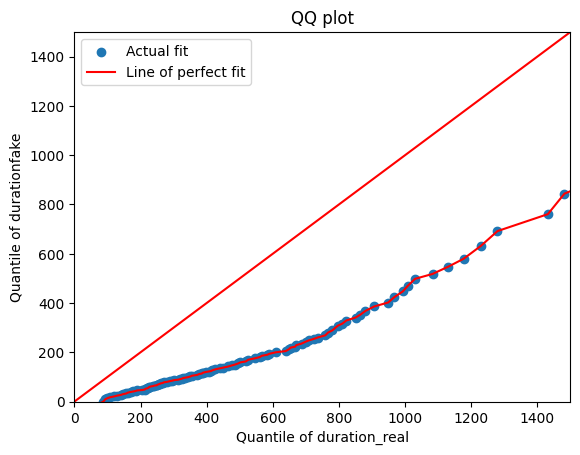

In [ ]:
qqplot(real_zeros, fake_zeros, [0,1500], [0,1500], 'duration')

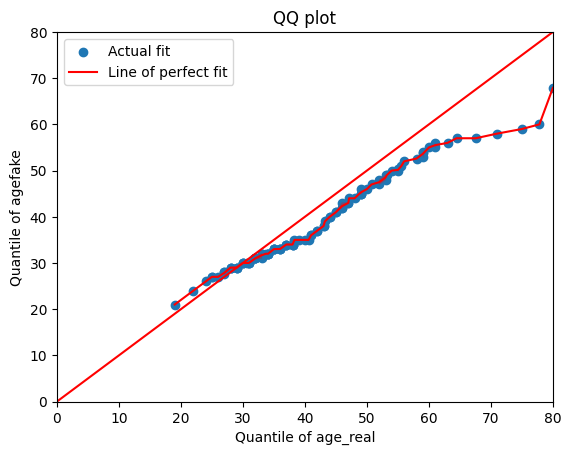

In [ ]:
qqplot(real_unos, fake_unos, [0,80], [0,80], 'age')

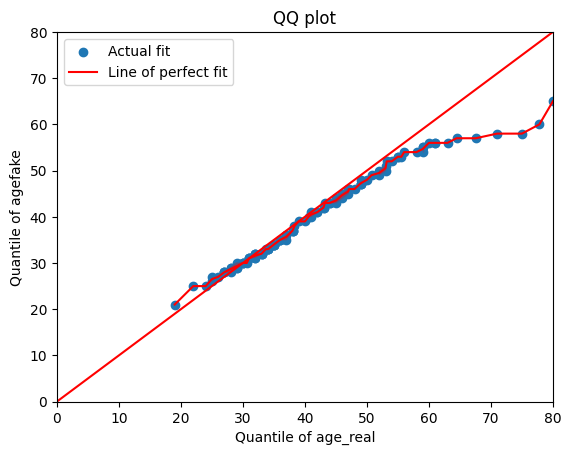

In [ ]:
qqplot(real_zeros, fake_zeros, [0,80], [0,80], 'age')

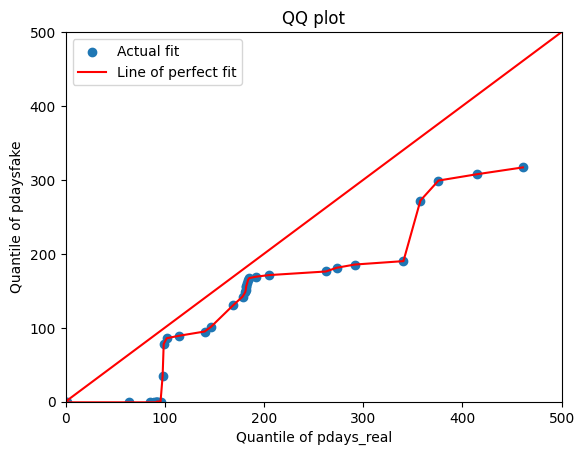

In [ ]:
qqplot(real_unos, fake_unos, [0,500], [0,500], 'pdays')

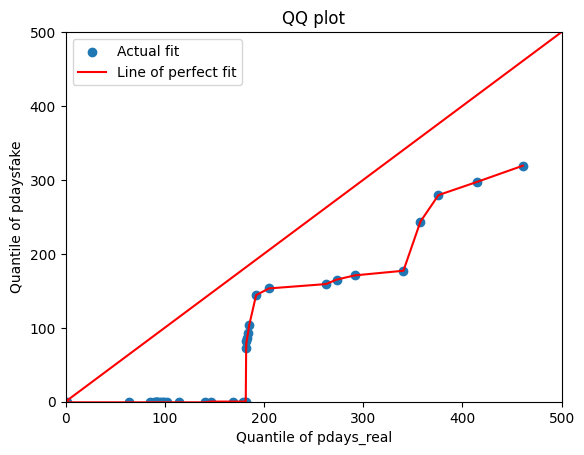

In [ ]:
qqplot(real_zeros, fake_zeros, [0,500], [0,500], 'pdays')

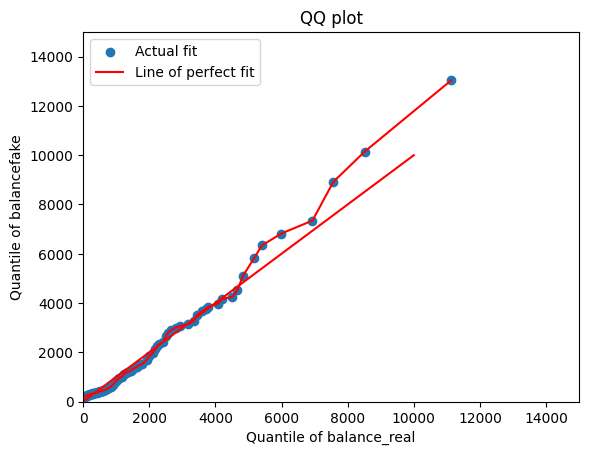

In [ ]:
qqplot(real_unos, fake_unos, [0,15000], [0,15000], 'balance')

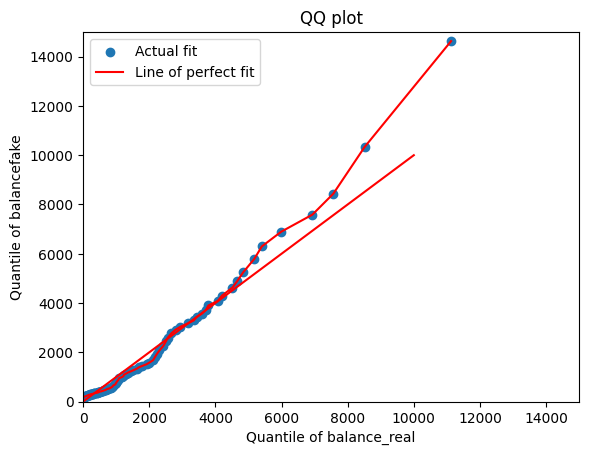

In [ ]:
qqplot(real_zeros, fake_zeros, [0,15000], [0,15000], 'balance')

In [ ]:
#KS unos

In [ ]:
for col in dataset.columns:
  print(str(col))
  print()
  print(ks_2samp(real_unos[str(col)], fake_unos[str(col)]))

age

KstestResult(statistic=0.04871920578502267, pvalue=0.6975454757259977, statistic_location=58, statistic_sign=-1)
job.admin.

KstestResult(statistic=0.036891775952935406, pvalue=0.9324596542086152, statistic_location=0, statistic_sign=-1)
job.blue.collar

KstestResult(statistic=0.036560853045716386, pvalue=0.9367159813884772, statistic_location=0, statistic_sign=1)
job.entrepreneur

KstestResult(statistic=0.005760509866405196, pvalue=1.0, statistic_location=0, statistic_sign=1)
job.housemaid

KstestResult(statistic=0.011533276136781468, pvalue=0.9999999999999991, statistic_location=0, statistic_sign=-1)
job.management

KstestResult(statistic=0.00011030763573967398, pvalue=1.0, statistic_location=0, statistic_sign=-1)
job.retired

KstestResult(statistic=0.07228827062139968, pvalue=0.2263304084383509, statistic_location=0, statistic_sign=-1)
job.self.employed

KstestResult(statistic=0.008947174898884667, pvalue=1.0, statistic_location=0, statistic_sign=-1)
job.services

KstestResult(

In [ ]:
for col in dataset.columns:
  print(col)
  print()
  print(calculate_psi(real_unos, fake_unos))

age

13.903727166885846
job.admin.

2.652769748474051
job.blue.collar

0.024616597436122763
job.entrepreneur

4.595252845721391
job.housemaid

0.006532891009104492
job.management

1.3024774408140458
job.retired

0.08092290200631996
job.self.employed

0.46273804952291947
job.services

3.026181712510215
job.student



<ipython-input-170-b0dbe83c2c28>:14: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-170-b0dbe83c2c28>:36: RuntimeWarning: divide by zero encountered in log
  psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)


0.6133577985766034
job.technician

1.1924980851336555
job.unemployed

0.0036158994348993224
job.unknown

0.22623769553967768
marital.divorced

2.931097871524929
marital.married

1.0424175206005986
marital.single

0.03210080570795466
education.primary

0.6842330256114015
education.secondary

2.8469539133726105
education.tertiary

0.2779694680188679
education.unknown

0.3927306224717325
default.no

0.0032002139541138152
default.yes

0.0032002139541138152
balance

0.6766366553568757
housing.no

0.5233635739341449
housing.yes

0.18025093392212266
loan.no

0.12131514538817559
loan.yes

0.07014381847125885
contact.cellular

0.06255919578817884
contact.telephone

0.06622021111690073
contact.unknown

0.6959782659773585
duration

7.2106000240878325
campaign

10.638413784912759
pdays

0.369293208625105
previous

1.6822769329393772
poutcome.failure

1.269538819022209
poutcome.other

0.15314416767180067
poutcome.success

2.1539480377358173
poutcome.unknown

1.095796696893102
target

0.0


In [ ]:
for col in dataset.columns:
  print(str(col))
  print()
  print(ks_2samp(real_zeros[str(col)], fake_zeros[str(col)]))

age

KstestResult(statistic=0.10442679353541129, pvalue=0.000885469388761655, statistic_location=58, statistic_sign=-1)
job.admin.

KstestResult(statistic=0.04846910126698588, pvalue=0.3701388899731546, statistic_location=0, statistic_sign=1)
job.blue.collar

KstestResult(statistic=0.05365343188802336, pvalue=0.2556039408875611, statistic_location=0, statistic_sign=1)
job.entrepreneur

KstestResult(statistic=0.037560363046075, pvalue=0.6903252105956632, statistic_location=0, statistic_sign=1)
job.housemaid

KstestResult(statistic=0.01489142308752514, pvalue=0.9999969525486214, statistic_location=0, statistic_sign=-1)
job.management

KstestResult(statistic=0.08016314612706613, pvalue=0.020904533904828253, statistic_location=0, statistic_sign=-1)
job.retired

KstestResult(statistic=0.04551143962674453, pvalue=0.4482825089272472, statistic_location=0, statistic_sign=-1)
job.self.employed

KstestResult(statistic=0.013226270814403415, pvalue=0.9999999259616298, statistic_location=0, statist

In [ ]:
for col in dataset.columns:
  print(col)
  print()
  print(calculate_psi(real_zeros, fake_zeros))

age

13.530864620352656
job.admin.

1.7727996352775943
job.blue.collar

1.8626770411304046
job.entrepreneur

3.5012049909357668
job.housemaid

0.022784234160918723
job.management

0.8102904728396547
job.retired

0.22510874929169866
job.self.employed

0.4081631199161846
job.services

10.036112827210326
job.student

0.018653405279215763
job.technician

0.0036573376793708487
job.unemployed

0.8084916019586774
job.unknown

0.0021937536909910687
marital.divorced

0.15792219728528942
marital.married

1.4205864797848862
marital.single



<ipython-input-170-b0dbe83c2c28>:14: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-170-b0dbe83c2c28>:36: RuntimeWarning: divide by zero encountered in log
  psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)


0.6809349976279383
education.primary

1.8295210907944996
education.secondary

0.2436054935679262
education.tertiary

1.5168007584742365
education.unknown

0.46133229604903886
default.no

0.003378818561338257
default.yes

5.695363857313308e-05
balance

0.038265927849672296
housing.no

8.043851078129956
housing.yes

7.404237026007059
loan.no

7.912885663016289
loan.yes

9.649227102024904
contact.cellular

16.956458953992726
contact.telephone

0.12063268064614968
contact.unknown

27.309601204303597
duration

1.8856533777281936
campaign

14.08675432473083
pdays

0.00021228804721258376
previous

5.675605101136674
poutcome.failure

0.07205628213420846
poutcome.other

0.06756004521455267
poutcome.success

2.8654604033977074
poutcome.unknown

4.9571256741483385
target

0.0


In [ ]:
##KS zeros

In [ ]:
for col in dataset.columns:
  print(str(col))
  print()
  print(ks_2samp(real_zeros[str(col)], fake_zeros[str(col)]))

age

KstestResult(statistic=0.08535648000599914, pvalue=0.010715468657367574, statistic_location=32, statistic_sign=1)
job.admin.

KstestResult(statistic=0.05825725052023772, pvalue=0.1728373054602447, statistic_location=0, statistic_sign=-1)
job.blue.collar

KstestResult(statistic=0.14052417464989408, pvalue=1.4464057415819258e-06, statistic_location=0, statistic_sign=1)
job.entrepreneur

KstestResult(statistic=0.0009467389062822219, pvalue=1.0, statistic_location=0, statistic_sign=-1)
job.housemaid

KstestResult(statistic=0.016467632777788194, pvalue=0.999956288093667, statistic_location=0, statistic_sign=-1)
job.management

KstestResult(statistic=0.032659680170975425, pvalue=0.830534377217224, statistic_location=0, statistic_sign=-1)
job.retired

KstestResult(statistic=0.06977184529723852, pvalue=0.060279988519388567, statistic_location=0, statistic_sign=-1)
job.self.employed

KstestResult(statistic=0.011988901595395661, pvalue=0.9999999979337607, statistic_location=0, statistic_sig

In [ ]:
#By cathegoric

In [ ]:
#Loan.yes

In [ ]:
real_loan_unos = dataset[dataset['loan.yes'] == 1]
real_loan_unos.head()

age  job.admin.  job.blue.collar  job.entrepreneur  job.housemaid  \
2    33           0                0                 0              0   
4    30           0                0                 0              0   
10   43           0                0                 0              0   
15   31           0                1                 0              0   
16   40           0                0                 0              0   

    job.management  job.retired  job.self.employed  job.services  job.student  \
2                0            0                  0             1            0   
4                1            0                  0             0            0   
10               0            0                  0             1            0   
15               0            0                  0             0            0   
16               1            0                  0             0            0   

    ...  contact.unknown  duration  campaign  pdays  previous  \
2   ...                0       220         1    339         4   
4   ...                1       199         4     -1         0   
10  ...                0       313         1    147         2   
15  ...                0        89         1    241         1   
16  ...                0       189         2     -1         0   

    poutcome.failure  poutcome.other  poutcome.success  poutcome.unknown  \
2                  1               0                 0                 0   
4                  0               0                 0                 1   
10                 1               0                 0                 0   
15                 1               0                 0                 0   
16                 0               0                 0                 1   

    target  
2        0  
4        0  
10       0  
15       0  
16       0  

[5 rows x 39 columns]

In [ ]:
real_loan_zeros = dataset[dataset['loan.yes'] == 0]
real_loan_zeros.head()

age  job.admin.  job.blue.collar  job.entrepreneur  job.housemaid  \
3   35           0                0                 0              0   
5   59           0                1                 0              0   
6   35           0                0                 0              0   
7   36           0                0                 0              0   
8   39           0                0                 0              0   

   job.management  job.retired  job.self.employed  job.services  job.student  \
3               1            0                  0             0            0   
5               0            0                  0             0            0   
6               1            0                  0             0            0   
7               0            0                  1             0            0   
8               0            0                  0             0            0   

   ...  contact.unknown  duration  campaign  pdays  previous  \
3  ...                0       185         1    330         1   
5  ...                1       226         1     -1         0   
6  ...                0       141         2    176         3   
7  ...                0       341         1    330         2   
8  ...                0       151         2     -1         0   

   poutcome.failure  poutcome.other  poutcome.success  poutcome.unknown  \
3                 1               0                 0                 0   
5                 0               0                 0                 1   
6                 1               0                 0                 0   
7                 0               1                 0                 0   
8                 0               0                 0                 1   

   target  
3       0  
5       0  
6       0  
7       0  
8       0  

[5 rows x 39 columns]

In [ ]:
fake_loan_unos = synthetic_dataset[synthetic_dataset['loan.yes'] == 1]
fake_loan_unos.head()

age  job.admin.  job.blue.collar  job.entrepreneur  job.housemaid  \
1    45           0                0                 0              0   
2    34           0                0                 0              0   
8    51           0                1                 0              0   
13   46           0                0                 0              0   
19   49           0                1                 0              0   

    job.management  job.retired  job.self.employed  job.services  job.student  \
1                0            0                  0             0            0   
2                0            0                  0             0            0   
8                0            0                  0             0            0   
13               0            0                  0             0            0   
19               0            0                  0             0            0   

    ...  contact.unknown  duration  campaign  pdays  previous  \
1   ...                1       250         2      0         0   
2   ...                1       134         1     -2         0   
8   ...                0        33         1     -3         0   
13  ...                1        79         2     -1         0   
19  ...                0        54         2     -3         0   

    poutcome.failure  poutcome.other  poutcome.success  poutcome.unknown  \
1                  0               0                 0                 1   
2                  0               0                 0                 1   
8                  0               0                 0                 1   
13                 0               0                 0                 1   
19                 0               0                 0                 1   

    target  
1        0  
2        0  
8        0  
13       0  
19       0  

[5 rows x 39 columns]

In [ ]:
fake_loan_zeros = synthetic_dataset[synthetic_dataset['loan.yes'] == 0]
fake_loan_zeros.head()

age  job.admin.  job.blue.collar  job.entrepreneur  job.housemaid  \
0   55           0                1                 0              0   
3   39           0                0                 0              0   
4   59           0                0                 0              0   
5   26           0                1                 0              0   
6   31           0                0                 0              0   

   job.management  job.retired  job.self.employed  job.services  job.student  \
0               0            0                  0             0            0   
3               1            0                  0             1            0   
4               0            0                  0             0            0   
5               0            0                  1             0            0   
6               0            0                  0             1            0   

   ...  contact.unknown  duration  campaign  pdays  previous  \
0  ...                1        78         1     -1         0   
3  ...                1      1132         3    171         0   
4  ...                0       280         1     -2         0   
5  ...                1       389         2     -2         0   
6  ...                1        13         2     -3         0   

   poutcome.failure  poutcome.other  poutcome.success  poutcome.unknown  \
0                 0               0                 0                 1   
3                 0               0                 0                 1   
4                 0               0                 0                 1   
5                 0               0                 0                 1   
6                 0               0                 0                 1   

   target  
0       0  
3       1  
4       0  
5       0  
6       0  

[5 rows x 39 columns]

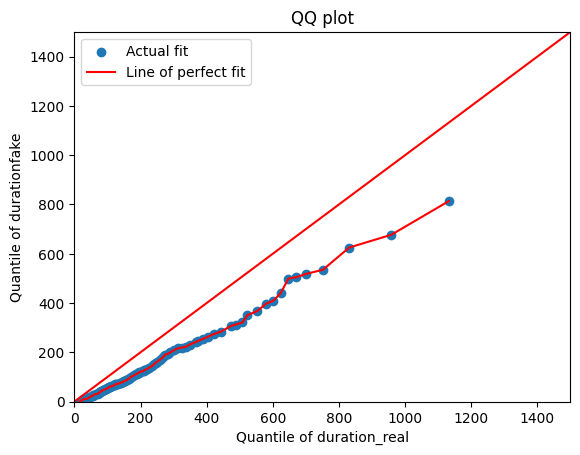

In [ ]:
qqplot(real_loan_unos, fake_loan_unos, [0,1500], [0,1500], 'duration')

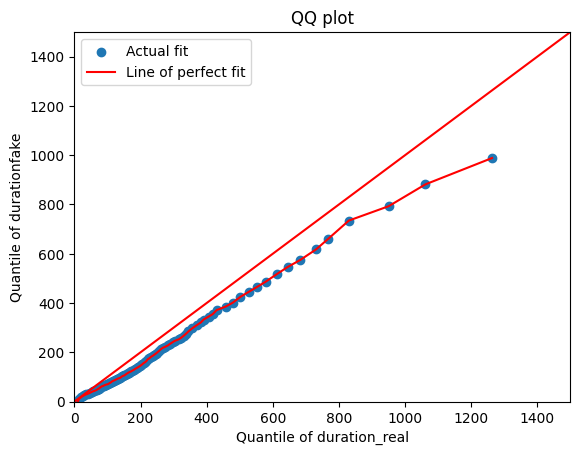

In [ ]:
qqplot(real_loan_zeros, fake_loan_zeros, [0,1500], [0,1500], 'duration')

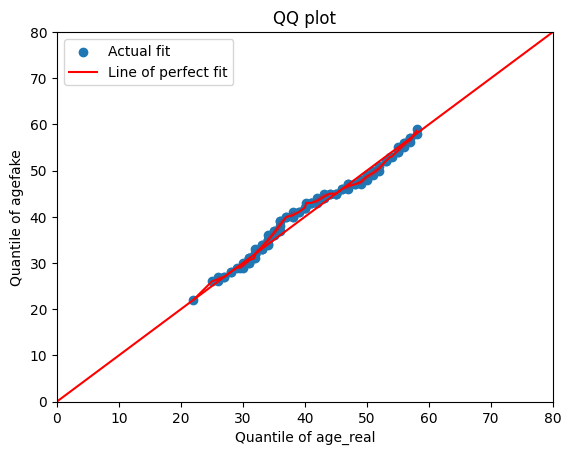

In [ ]:
qqplot(real_loan_unos, fake_loan_unos, [0,80], [0,80], 'age')

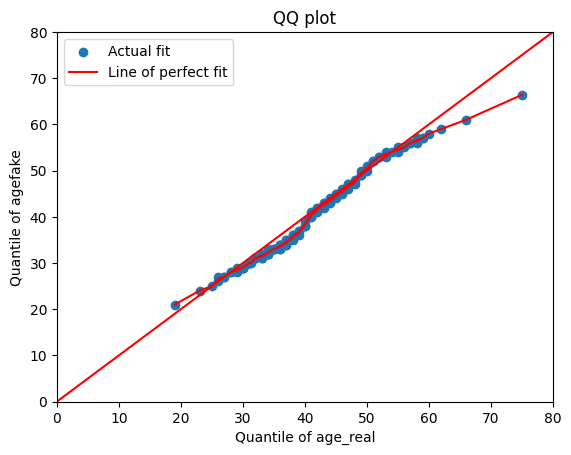

In [ ]:
qqplot(real_loan_zeros, fake_loan_zeros, [0,80], [0,80], 'age')

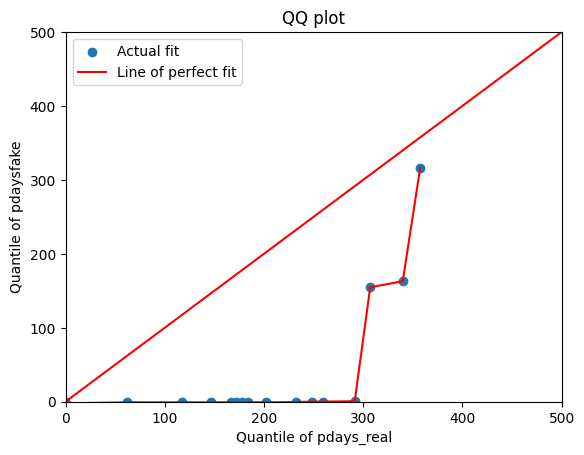

In [ ]:
qqplot(real_loan_unos, fake_loan_unos, [0,500], [0,500], 'pdays')

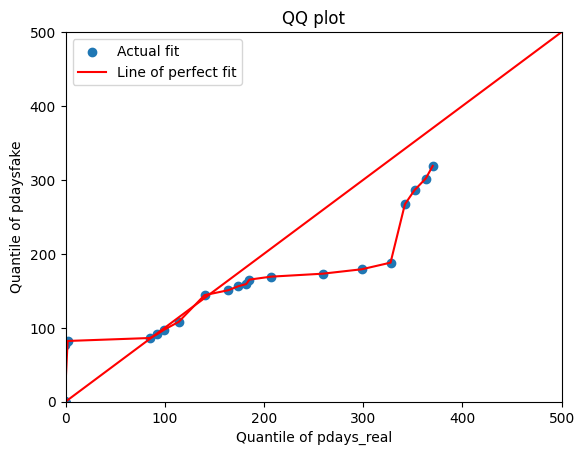

In [ ]:
qqplot(real_loan_zeros, fake_loan_zeros, [0,500], [0,500], 'pdays')

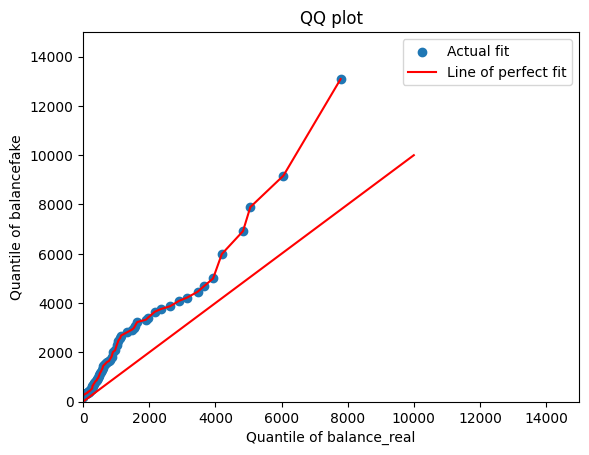

In [ ]:
qqplot(real_loan_unos, fake_loan_unos, [0,15000], [0,15000], 'balance')

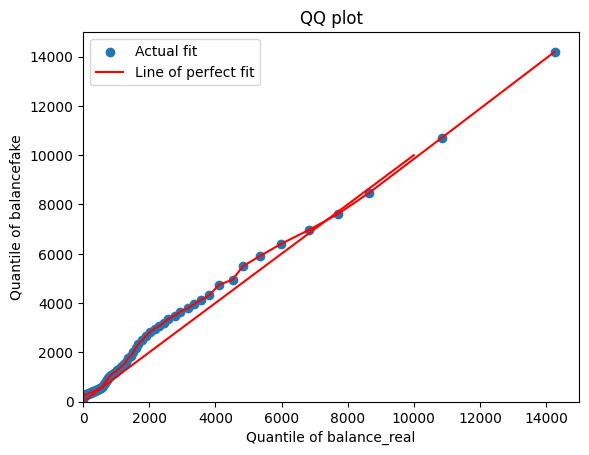

In [ ]:
qqplot(real_loan_zeros, fake_loan_zeros, [0,15000], [0,15000], 'balance')

In [ ]:
for col in dataset.columns:
  print(str(col))
  print()
  print(ks_2samp(real_loan_zeros[str(col)], fake_loan_zeros[str(col)]))

age

KstestResult(statistic=0.10578841099636682, pvalue=4.469063318682681e-14, statistic_location=33, statistic_sign=-1)
job.admin.

KstestResult(statistic=0.07824622952849945, pvalue=6.785464060832245e-08, statistic_location=0, statistic_sign=1)
job.blue.collar

KstestResult(statistic=0.0679375163056333, pvalue=4.6563771625213835e-06, statistic_location=0, statistic_sign=-1)
job.entrepreneur

KstestResult(statistic=0.03423497775327915, pvalue=0.07327328783868546, statistic_location=0, statistic_sign=1)
job.housemaid

KstestResult(statistic=0.0038247813141756735, pvalue=1.0, statistic_location=0, statistic_sign=-1)
job.management

KstestResult(statistic=0.05954005171106367, pvalue=9.38619614297074e-05, statistic_location=0, statistic_sign=-1)
job.retired

KstestResult(statistic=0.01362338834359129, pvalue=0.9534397063068835, statistic_location=0, statistic_sign=1)
job.self.employed

KstestResult(statistic=0.01075461201982765, pvalue=0.9963070428672177, statistic_location=0, statistic_s

In [ ]:
for col in dataset.columns:
  print(col)
  print()
  print(calculate_psi(real_loan_unos, fake_loan_unos))

age

9.102587903412468
job.admin.

0.5769796243005216
job.blue.collar

3.4669068804188194
job.entrepreneur

0.048034825200194926
job.housemaid

0.004477312293343794
job.management

0.0335161355888206
job.retired

0.028403732974952963
job.self.employed

0.18360754186323008
job.services

10.421307311517031
job.student

0.00034198508099100785
job.technician

1.7372640413203166
job.unemployed

11.636137641574509
job.unknown

0.0
marital.divorced

2.0520880904412713
marital.married

14.135666387326912
marital.single

4.747638181735231
education.primary

59.505145547027396
education.secondary

19.655604117589192
education.tertiary

2.530754553141648
education.unknown

12.31033149937386
default.no

0.10722775891274618
default.yes

0.014503102197996167
balance



<ipython-input-170-b0dbe83c2c28>:14: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-170-b0dbe83c2c28>:36: RuntimeWarning: divide by zero encountered in log
  psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)


1.3231016323968956
housing.no

11.719042984582542
housing.yes

10.253789615464013
loan.no

0.0
loan.yes

0.0
contact.cellular

20.05538788768119
contact.telephone

0.24345519955997466
contact.unknown

22.56925335171326
duration

26.661391271356543
campaign

18.342999297795377
pdays

0.027541131279484498
previous

1.5616738817810727
poutcome.failure

0.8810633265325206
poutcome.other

0.027762765048435133
poutcome.success

0.002201640556166342
poutcome.unknown

1.3371748188001418
target

0.10425497267954546


In [ ]:
for col in dataset.columns:
  print(str(col))
  print()
  print(ks_2samp(real_loan_zeros[str(col)], fake_loan_zeros[str(col)]))

age

KstestResult(statistic=0.10578841099636682, pvalue=4.469063318682681e-14, statistic_location=33, statistic_sign=-1)
job.admin.

KstestResult(statistic=0.07824622952849945, pvalue=6.785464060832245e-08, statistic_location=0, statistic_sign=1)
job.blue.collar

KstestResult(statistic=0.0679375163056333, pvalue=4.6563771625213835e-06, statistic_location=0, statistic_sign=-1)
job.entrepreneur

KstestResult(statistic=0.03423497775327915, pvalue=0.07327328783868546, statistic_location=0, statistic_sign=1)
job.housemaid

KstestResult(statistic=0.0038247813141756735, pvalue=1.0, statistic_location=0, statistic_sign=-1)
job.management

KstestResult(statistic=0.05954005171106367, pvalue=9.38619614297074e-05, statistic_location=0, statistic_sign=-1)
job.retired

KstestResult(statistic=0.01362338834359129, pvalue=0.9534397063068835, statistic_location=0, statistic_sign=1)
job.self.employed

KstestResult(statistic=0.01075461201982765, pvalue=0.9963070428672177, statistic_location=0, statistic_s

In [ ]:
for col in dataset.columns:
  print(col)
  print()
  print(calculate_psi(real_loan_zeros, fake_loan_zeros))

age

8.394649224907367
job.admin.

4.518136477277635
job.blue.collar

0.5591567804260154
job.entrepreneur

2.4626425208777194
job.housemaid

0.0014985173086127636
job.management

0.4373244790856723
job.retired

0.31515828647479693
job.self.employed

0.25616619359242815
job.services



<ipython-input-170-b0dbe83c2c28>:14: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-170-b0dbe83c2c28>:36: RuntimeWarning: divide by zero encountered in log
  psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)


3.3872313710752895
job.student

0.8290934976946925
job.technician

0.5477847008816369
job.unemployed

0.01826349234339323
job.unknown

0.005305896651540299
marital.divorced

1.1150067368378795
marital.married

2.0727129366364934
marital.single

0.6769871899844971
education.primary

0.8104489357209996
education.secondary

1.0508688548325014
education.tertiary

0.004682977378951984
education.unknown

0.040558447278480944
default.no

0.00013724983573040075
default.yes

3.697168097810181e-07
balance

22.351254128661363
housing.no

0.5298221136709063
housing.yes

0.7410452027615575
loan.no

0.0
loan.yes

0.0
contact.cellular

0.2469687764810416
contact.telephone

0.013230761529837421
contact.unknown

0.1895508641283913
duration

22.05070714902107
campaign

6.67304544396408
pdays

11.898608619661253
previous

2.585237719428811
poutcome.failure

0.2540624354206068
poutcome.other

0.04696609461617263
poutcome.success

0.020406074469780957
poutcome.unknown

0.3535396308391509
target

6.34307840

#Model xgboost split


In [6]:
import random

In [7]:
test_size = 0.2
num_test_samples = int(len(dataset) * test_size)

In [8]:
test_indices = random.sample(range(len(dataset)), num_test_samples)


In [9]:
data_test = dataset.iloc[test_indices,:]
data_test

id  nfamilias_vinc  nfamilias_vinc_hace4  \
81204   202359.0               7                     7   
69239   257778.0               4                     4   
10973   458694.0               4                     3   
106089  153799.0               7                     7   
95950   192212.0               4                     4   
...          ...             ...                   ...   
57551   294937.0               4                     3   
827     462246.0               4                     3   
46612   320716.0               7                     7   
131464   40626.0               6                     6   
53088   310103.0               5                     5   

        nfamilias_vinc_n6_hace2  nfamilias_vinc_n6_hace4  \
81204                         7                        7   
69239                         4                        4   
10973                         4                        4   
106089                        7                        7   
95950                         4                        4   
...                         ...                      ...   
57551                         3                        3   
827                           4                        4   
46612                         6                        6   
131464                        5                        5   
53088                         5                        5   

        nfamilias_vinc_hace13  nfamilias_vinc_n6_hace13  \
81204                       8                         7   
69239                       3                         4   
10973                       4                         5   
106089                      8                         7   
95950                       4                         3   
...                       ...                       ...   
57551                       3                         5   
827                         4                         4   
46612                       5                         5   
131464                      5                         5   
53088                       5                         5   

        maturidade_ch_carteira  d_0_v_spm_ch_hace_1y2  n_ch_carteira_hace4  \
81204                      241              -0.011112                    3   
69239                        0               0.000000                    0   
10973                      193              -0.006659                    1   
106089                     365              -0.007264                    4   
95950                        0               0.000000                    0   
...                        ...                    ...                  ...   
57551                        0               0.000000                    0   
827                        522              -0.001881                    3   
46612                      385              -0.002426                    1   
131464                       0               0.000000                    0   
53088                        0               0.000000                    0   

        ...  d_0_v_spm_ch_hace_1y4  montante_total_ch_carteira_hace7  \
81204   ...              -0.032619                         219395.64   
69239   ...               0.000000                              0.00   
10973   ...              -0.019694                          55000.00   
106089  ...               0.001431                         129948.89   
95950   ...               0.000000                              0.00   
...     ...                    ...                               ...   
57551   ...               0.000000                              0.00   
827     ...              -0.005616                         126547.46   
46612   ...              -0.007240                              0.00   
131464  ...               0.000000                              0.00   
53088   ...               0.000000                              0.00   

        v_smm_ch_hace7  vmargemf_vact_hace2  vmargemf_vact_hace4  \
81204         364

In [10]:
data_train = dataset.loc[~dataset.index.isin(test_indices),:]
data_train

id  nfamilias_vinc  nfamilias_vinc_hace4  \
1       456366.0               4                     4   
2       477691.0               4                     4   
3       461769.0               7                     7   
5       484257.0               6                     6   
8       482181.0               5                     6   
...          ...             ...                   ...   
143838   30509.0               7                     7   
143839   13149.0               7                     6   
143840   24560.0               7                     7   
143842   35782.0               5                     5   
143843   27083.0               5                     5   

        nfamilias_vinc_n6_hace2  nfamilias_vinc_n6_hace4  \
1                             4                        4   
2                             4                        4   
3                             7                        7   
5                             6                        6   
8                             6                        6   
...                         ...                      ...   
143838                        7                        7   
143839                        7                        6   
143840                        7                        8   
143842                        5                        6   
143843                        6                        6   

        nfamilias_vinc_hace13  nfamilias_vinc_n6_hace13  \
1                           4                         4   
2                           3                         3   
3                           7                         7   
5                           6                         6   
8                           6                         6   
...                       ...                       ...   
143838                      7                         6   
143839                      6                         7   
143840                      8                         8   
143842                      6                         7   
143843                      7                         6   

        maturidade_ch_carteira  d_0_v_spm_ch_hace_1y2  n_ch_carteira_hace4  \
1                            0               0.000000                    0   
2                            0               0.000000                    0   
3                          481              -0.003486                    2   
5                            0               0.000000                    0   
8                            0               0.000000                    0   
...                        ...                    ...                  ...   
143838                     497               0.000000                    1   
143839                     301               0.000000                    1   
143840                     253              -0.013161                    1   
143842                     481              -0.003387                    1   
143843                     517              -0.001678                    1   

        ...  d_0_v_spm_ch_hace_1y4  montante_total_ch_carteira_hace7  \
1       ...               0.000000                               0.0   
2       ...               0.000000                               0.0   
3       ...              -0.010385                          170000.0   
5       ...               0.000000                               0.0   
8       ...               0.000000                               0.0   
...     ...                    ...                               ...   
143838  ...               0.000000                          157500.0   
143839  ...               0.000000                           67500.0   
143840  ...              -0.038483                           60000.0   
143842  ...              -0.010096                          126144.0   
143843  ...              -0.005012                          165000.0   

        v_smm_ch_hace7  vmargemf_vact_hace2  vmargemf_vact_hace4  \
1                

In [11]:
train_ids = data_train['id'].values
test_ids = data_test['id'].values

In [13]:
data_train.columns

Index(['id', 'nfamilias_vinc', 'nfamilias_vinc_hace4',
       'nfamilias_vinc_n6_hace2', 'nfamilias_vinc_n6_hace4',
       'nfamilias_vinc_hace13', 'nfamilias_vinc_n6_hace13',
       'maturidade_ch_carteira', 'd_0_v_spm_ch_hace_1y2',
       'n_ch_carteira_hace4', 'ich_hace4', 'd_0_v_spm_ch_hace_1y4',
       'montante_total_ch_carteira_hace7', 'v_smm_ch_hace7',
       'vmargemf_vact_hace2', 'vmargemf_vact_hace4', 'taxa_media_ch_carteira',
       'vrec_vact_hace2', 'd_0_v_smm_ch_hace_1y7', 'd_0_vact_hace_1y2',
       'target'],
      dtype='object')

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [16]:
#data_train = data_train.drop('id', axis = 1)
#data_test = data_test.drop('id', axis = 1)

In [13]:
# Split the data into training and testing sets
X_train, X_testt, y_train, y_testt = train_test_split(data_train.drop('target', axis = 1), data_train['target'], test_size=0.2, random_state=5)
X_train_ids = X_train['id']
X_test_ids = X_testt['id']
X_train = X_train.drop('id', axis = 1)
X_testt = X_testt.drop('id', axis = 1)

In [14]:
# Create the XGBoost regressor and specify hyperparameters
xgb_model_real = xgb.XGBClassifier(
    objective='multi:softmax',  # For multiclass classification tasks
    num_class=2,      # Number of classes in the target variable
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    random_state=5
)

# Train the model on the training data
xgb_model_real.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model_real.predict(X_testt)

probs_xg_real = xgb_model_real.predict_proba(X_testt)

accuracy = accuracy_score(y_testt, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_testt, y_pred))





Accuracy: 0.992570385818561

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22845
           1       0.00      0.00      0.00       171

    accuracy                           0.99     23016
   macro avg       0.50      0.50      0.50     23016
weighted avg       0.99      0.99      0.99     23016



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_testt, probs_xg_real[:,1])

0.7240549581593001

In [202]:
probs_xg_real = pd.DataFrame(probs_xg_real)

In [70]:
X_test_ids.dtype

dtype('float64')

In [203]:
probs_xg_real['id'] =np.array(X_test_ids, dtype='int32')

In [204]:
probs_xg_real['target'] = y_testt.values
probs_xg_real.head()

0         1      id  target
0  0.999515  0.000485   54122       0
1  0.998747  0.001253   74514       0
2  0.999385  0.000615  362874       0
3  0.999105  0.000895  432030       0
4  0.940260  0.059740   50028       0

In [205]:
probs_xg_real.to_csv('p_xg_real_churn.csv', index=True)

In [88]:
data_test.columns

Index(['id', 'nfamilias_vinc', 'nfamilias_vinc_hace4',
       'nfamilias_vinc_n6_hace2', 'nfamilias_vinc_n6_hace4',
       'nfamilias_vinc_hace13', 'nfamilias_vinc_n6_hace13',
       'maturidade_ch_carteira', 'd_0_v_spm_ch_hace_1y2',
       'n_ch_carteira_hace4', 'ich_hace4', 'd_0_v_spm_ch_hace_1y4',
       'montante_total_ch_carteira_hace7', 'v_smm_ch_hace7',
       'vmargemf_vact_hace2', 'vmargemf_vact_hace4', 'taxa_media_ch_carteira',
       'vrec_vact_hace2', 'd_0_v_smm_ch_hace_1y7', 'd_0_vact_hace_1y2',
       'target'],
      dtype='object')

#Dataset data_test aislado

In [15]:
y_datos = data_test['target']
datos = data_test.drop(columns=['target','id'], axis = 1)
y_pred_first_original = xgb_model_real.predict(datos)
probs_xg_real_original = xgb_model_real.predict_proba(datos)
accuracy = accuracy_score(y_datos, y_pred_first_original)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_datos, y_pred_first_original))

Accuracy: 0.9930825917686318

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28569
           1       0.00      0.00      0.00       199

    accuracy                           0.99     28768
   macro avg       0.50      0.50      0.50     28768
weighted avg       0.99      0.99      0.99     28768



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
probs_xg_real_original = pd.DataFrame(probs_xg_real_original)

In [17]:
probs_xg_real_original['id'] = np.array(test_ids, dtype='int32')

In [18]:
probs_xg_real_original['target'] = np.array(y_datos, dtype='int32')
probs_xg_real_original.head()

0         1      id  target
0  0.999634  0.000366  202359       0
1  0.983922  0.016078  257778       0
2  0.950098  0.049902  458694       0
3  0.999185  0.000815  153799       0
4  0.983367  0.016633  192212       0

In [19]:
probs_xg_real_original.to_csv('p_xg_real_original_churn.csv', index=True)

In [28]:
#synthetic_datasett = synthetic_dataset.drop('id', axis = 1)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(synthetic_dataset.drop('target', axis = 1), synthetic_dataset['target'], test_size=0.2, random_state=45)
X_test_fake_ids = X_test['id']
X_test = X_test.drop('id', axis = 1)
X_train = X_train.drop('id', axis = 1)

In [95]:
X_train.columns

Index(['nfamilias_vinc', 'nfamilias_vinc_hace4', 'nfamilias_vinc_n6_hace2',
       'nfamilias_vinc_n6_hace4', 'nfamilias_vinc_hace13',
       'nfamilias_vinc_n6_hace13', 'maturidade_ch_carteira',
       'd_0_v_spm_ch_hace_1y2', 'n_ch_carteira_hace4', 'ich_hace4',
       'd_0_v_spm_ch_hace_1y4', 'montante_total_ch_carteira_hace7',
       'v_smm_ch_hace7', 'vmargemf_vact_hace2', 'vmargemf_vact_hace4',
       'taxa_media_ch_carteira', 'vrec_vact_hace2', 'd_0_v_smm_ch_hace_1y7',
       'd_0_vact_hace_1y2'],
      dtype='object')

In [100]:
data_test.columns

Index(['id', 'nfamilias_vinc', 'nfamilias_vinc_hace4',
       'nfamilias_vinc_n6_hace2', 'nfamilias_vinc_n6_hace4',
       'nfamilias_vinc_hace13', 'nfamilias_vinc_n6_hace13',
       'maturidade_ch_carteira', 'd_0_v_spm_ch_hace_1y2',
       'n_ch_carteira_hace4', 'ich_hace4', 'd_0_v_spm_ch_hace_1y4',
       'montante_total_ch_carteira_hace7', 'v_smm_ch_hace7',
       'vmargemf_vact_hace2', 'vmargemf_vact_hace4', 'taxa_media_ch_carteira',
       'vrec_vact_hace2', 'd_0_v_smm_ch_hace_1y7', 'd_0_vact_hace_1y2',
       'target'],
      dtype='object')

In [21]:
# Create the XGBoost regressor and specify hyperparameters
xgb_model_fake = xgb.XGBClassifier(
    objective='multi:softmax',  # For multiclass classification tasks
    num_class=2,      # Number of classes in the target variable
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    random_state=15
)

# Train the model on the training data
xgb_model_fake.fit(X_train, y_train)

# Make predictions on the test data
y_test = data_test['target']
y_pred_fake = xgb_model_fake.predict(data_test.drop(columns=['id','target']))

probs_xg_fake = xgb_model_real.predict_proba(data_test.drop(columns=['id','target']))

accuracy = accuracy_score(y_test, y_pred_fake)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_fake))

Accuracy: 0.9930825917686318

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28569
           1       0.00      0.00      0.00       199

    accuracy                           0.99     28768
   macro avg       0.50      0.50      0.50     28768
weighted avg       0.99      0.99      0.99     28768



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
probs_xg_fake = pd.DataFrame(probs_xg_fake)

In [ ]:
roc_auc_score(y_testt, probs_xg_fake[:,1])

InvalidIndexError: ignored

In [23]:
probs_xg_fake['id'] = np.array(test_ids, dtype = 'int32')

In [24]:
probs_xg_fake['target'] = y_test.values

In [25]:
probs_xg_fake.to_csv('p_xg_fake_original_churn.csv', index=True)

In [219]:
print(ks_2samp(y_test, y_pred))
print(ks_2samp(y_test, y_pred_fake))

NameError: ignored

In [ ]:
#Use one or another as corresponds

In [36]:
expected=y_testt
actual = y_pred
print(len(y_testt))
print(len(y_pred))

23015
23015


In [ ]:
expected=y_testt
actual = y_pred_fake
print(len(y_testt))
print(len(y_pred_fake))

56688
56688


In [37]:
bins = np.percentile(expected, np.linspace(0, 100, 10+1))

    # Calculate expected and actual proportions in each bin
expected_counts = np.histogram(expected, bins=bins)[0]
actual_counts = np.histogram(actual, bins=bins)[0]

    # Calculate expected and actual proportions
expected_proportions = expected_counts / len(expected)
actual_proportions = actual_counts / len(actual)

    # Calculate PSI for each bin
psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
psi = (np.array(actual_proportions) - np.array(expected_proportions)) * np.where(np.log(np.array(actual_proportions) / np.array(expected_proportions)) > 0, np.log(np.array(actual_proportions) / np.array(expected_proportions)), 0)

    # Sum PSI for all bins to get the overall PSI score
np.sum(psi) * 100




<ipython-input-37-1a54ad8cc8e6>:12: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-37-1a54ad8cc8e6>:13: RuntimeWarning: invalid value encountered in divide
  psi = (np.array(actual_proportions) - np.array(expected_proportions)) * np.where(np.log(np.array(actual_proportions) / np.array(expected_proportions)) > 0, np.log(np.array(actual_proportions) / np.array(expected_proportions)), 0)


0.0

#CONDITIONS

In [26]:
synthetic_bank_cond1 = ctgan.sample(6000000)

In [27]:
gen_unos_fake = synthetic_bank_cond1[synthetic_bank_cond1['target'] == 1]
len(gen_unos_fake)

18469

In [40]:
gen_unos_fake.head()

id  nfamilias_vinc  nfamilias_vinc_hace4  \
199    46111.231004               5                     4   
286   316426.444244               4                     4   
365   348091.258073               4                     4   
1152  273880.991064               4                     4   
1560    8620.189465               4                     4   

      nfamilias_vinc_n6_hace2  nfamilias_vinc_n6_hace4  nfamilias_vinc_hace13  \
199                         4                        2                      2   
286                         3                        3                      4   
365                         4                        4                      6   
1152                        5                        5                      5   
1560                        3                        3                      3   

      nfamilias_vinc_n6_hace13  maturidade_ch_carteira  d_0_v_spm_ch_hace_1y2  \
199                          2                       0         -125998.823021   
286                          2                       1           60228.388729   
365                          6                       0          189083.653750   
1152                         6                       0           26221.974991   
1560                         3                       0          -96543.145874   

      n_ch_carteira_hace4  ...  d_0_v_spm_ch_hace_1y4  \
199                     0  ...         -531907.538918   
286                     0  ...         -820586.008957   
365                     0  ...           67409.088441   
1152                    0  ...         -330633.585279   
1560                    0  ...         -816986.599896   

      montante_total_ch_carteira_hace7  v_smm_ch_hace7  vmargemf_vact_hace2  \
199                        -703.591040     -210.091895             0.029146   
286                          30.760591      188.968773             0.040130   
365                        -131.937004      190.620007             0.051085   
1152                        148.572108     -311.501086             0.027998   
1560                       -289.945445     -113.640659             0.032264   

      vmargemf_vact_hace4  taxa_media_ch_carteira  vrec_vact_hace2  \
199              0.037874               -0.001557         0.559054   
286             -0.003443                0.002708       -28.353042   
365              0.031194                0.001555         7.736884   
1152            -0.004071                0.006589         0.774996   
1560            -0.000140                0.011836       -23.325825   

      d_0_v_smm_ch_hace_1y7  d_0_vact_hace_1y2  target  
199           173084.567165       92589.611958       1  
286            11865.003343     -283103.339742       1  
365          -305122.777262     -252339.256534       1  
1152         -615750.232787     -429965.648803       1  
1560         -326884.708521     -199339.797650       1  

[5 rows x 21 columns]

In [28]:
data_train = dataset.loc[~dataset.index.isin(test_indices),:]

In [29]:
data_train.head()

id  nfamilias_vinc  nfamilias_vinc_hace4  nfamilias_vinc_n6_hace2  \
1  456366.0               4                     4                        4   
2  477691.0               4                     4                        4   
3  461769.0               7                     7                        7   
5  484257.0               6                     6                        6   
8  482181.0               5                     6                        6   

   nfamilias_vinc_n6_hace4  nfamilias_vinc_hace13  nfamilias_vinc_n6_hace13  \
1                        4                      4                         4   
2                        4                      3                         3   
3                        7                      7                         7   
5                        6                      6                         6   
8                        6                      6                         6   

   maturidade_ch_carteira  d_0_v_spm_ch_hace_1y2  n_ch_carteira_hace4  ...  \
1                       0               0.000000                    0  ...   
2                       0               0.000000                    0  ...   
3                     481              -0.003486                    2  ...   
5                       0               0.000000                    0  ...   
8                       0               0.000000                    0  ...   

   d_0_v_spm_ch_hace_1y4  montante_total_ch_carteira_hace7  v_smm_ch_hace7  \
1               0.000000                               0.0            0.00   
2               0.000000                               0.0            0.00   
3              -0.010385                          170000.0        91240.62   
5               0.000000                               0.0            0.00   
8               0.000000                               0.0            0.00   

   vmargemf_vact_hace2  vmargemf_vact_hace4  taxa_media_ch_carteira  \
1             0.000000             0.000000                0.000000   
2             0.011386             0.006713                0.000000   
3             0.002556             0.001508                4.824118   
5             0.040780             0.023869                0.000000   
8             0.000000             0.000000                0.000000   

   vrec_vact_hace2  d_0_v_smm_ch_hace_1y7  d_0_vact_hace_1y2  target  
1         0.000000               0.000000           0.000000       0  
2         0.361655               0.000000          -0.018459       0  
3         0.831615              -0.020529          -0.003478       0  
5        11.457745               0.000000          -0.025379       0  
8         0.000000               0.000000           0.000000       0  

[5 rows x 21 columns]

In [30]:
dataset_mas_unos = pd.concat([data_train, gen_unos_fake])
dataset_mas_unos.columns

Index(['id', 'nfamilias_vinc', 'nfamilias_vinc_hace4',
       'nfamilias_vinc_n6_hace2', 'nfamilias_vinc_n6_hace4',
       'nfamilias_vinc_hace13', 'nfamilias_vinc_n6_hace13',
       'maturidade_ch_carteira', 'd_0_v_spm_ch_hace_1y2',
       'n_ch_carteira_hace4', 'ich_hace4', 'd_0_v_spm_ch_hace_1y4',
       'montante_total_ch_carteira_hace7', 'v_smm_ch_hace7',
       'vmargemf_vact_hace2', 'vmargemf_vact_hace4', 'taxa_media_ch_carteira',
       'vrec_vact_hace2', 'd_0_v_smm_ch_hace_1y7', 'd_0_vact_hace_1y2',
       'target'],
      dtype='object')

#¿Mejoran los KPIs con más unos generados?

In [31]:
test_size = 0.2
num_test_samples = int(len(dataset_mas_unos) * test_size)

In [32]:
test_indices = random.sample(range(len(dataset_mas_unos)), num_test_samples)

In [114]:
#dataset_mas_unos = dataset_mas_unos.drop('id', axis = 1)

In [33]:
data_test = dataset_mas_unos.iloc[test_indices,:]
data_train = dataset_mas_unos.loc[~dataset_mas_unos.index.isin(test_indices),:]

In [34]:
train_ids_unos = data_train['id'].values
test_ids_unos = data_test['id'].values

In [35]:
test_ids_unos

array([126347.        ,  80286.        ,   5036.        , ...,
        15785.03916815,  71483.        , 227630.        ])

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train.drop('target', axis = 1), data_train['target'], test_size=0.2, random_state=2)
X_test_fake_ids = X_test['id']
X_test = X_test.drop('id', axis = 1)
X_train = X_train.drop('id', axis = 1)

In [37]:
X_test_fake_ids

706832      68317.921253
31572      388375.000000
1428698    372137.210897
58879      278261.000000
4110       467512.000000
               ...      
26853      397661.000000
99352      127234.000000
113866      77645.000000
105593     154457.000000
7594       453833.000000
Name: id, Length: 22401, dtype: float64

In [168]:
X_train.columns

Index(['nfamilias_vinc', 'nfamilias_vinc_hace4', 'nfamilias_vinc_n6_hace2',
       'nfamilias_vinc_n6_hace4', 'nfamilias_vinc_hace13',
       'nfamilias_vinc_n6_hace13', 'maturidade_ch_carteira',
       'd_0_v_spm_ch_hace_1y2', 'n_ch_carteira_hace4', 'ich_hace4',
       'd_0_v_spm_ch_hace_1y4', 'montante_total_ch_carteira_hace7',
       'v_smm_ch_hace7', 'vmargemf_vact_hace2', 'vmargemf_vact_hace4',
       'taxa_media_ch_carteira', 'vrec_vact_hace2', 'd_0_v_smm_ch_hace_1y7',
       'd_0_vact_hace_1y2'],
      dtype='object')

In [38]:
# Create the XGBoost regressor and specify hyperparameters
xgb_model_fake_unos = xgb.XGBClassifier(
    objective='multi:softmax',  # For multiclass classification tasks
    num_class=2,      # Number of classes in the target variable
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    random_state=1
)

# Train the model on the training data
xgb_model_fake_unos.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model_fake_unos.predict(X_test)

probs_xg_fake_unos = xgb_model_fake_unos.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9938395607338958

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18621
           1       1.00      0.96      0.98      3780

    accuracy                           0.99     22401
   macro avg       1.00      0.98      0.99     22401
weighted avg       0.99      0.99      0.99     22401



In [ ]:
roc_auc_score(y_test, probs_xg_fake_unos[:,1])

0.9460248500374183

In [39]:
probs_xg_fake_unos = pd.DataFrame(probs_xg_fake_unos)

In [40]:
X_test_fake_ids.values

array([ 68317.92125315, 388375.        , 372137.21089658, ...,
        77645.        , 154457.        , 453833.        ])

In [41]:
probs_xg_fake_unos['id'] = np.array(X_test_fake_ids, dtype = 'int32')

In [42]:
probs_xg_fake_unos['target'] = y_test.values

In [43]:
probs_xg_fake_unos.head()

0         1      id  target
0  0.000289  0.999711   68317       1
1  0.997668  0.002332  388375       0
2  0.000147  0.999853  372137       1
3  0.996417  0.003583  278261       0
4  0.988651  0.011349  467512       0

In [44]:
probs_xg_fake_unos.to_csv('p_xg_fake_unos_churn.csv', index = True)

In [235]:
ks_2samp(y_test,y_pred)

NameError: ignored

In [45]:
data_test = dataset.iloc[test_indices,:]

In [46]:
test_ids = data_test['id'].values

nuevo

In [47]:
y_datos = data_test['target']
datos = data_test.drop(['target'], axis = 1)
y_pred_original = xgb_model_fake_unos.predict(datos.drop('id', axis = 1))
probs_xg_fake_unos_original = xgb_model_fake_unos.predict_proba(datos.drop('id', axis = 1))
accuracy = accuracy_score(y_datos, y_pred_original)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_datos, y_pred_original))

Accuracy: 0.992961174136059

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26521
           1       0.00      0.00      0.00       188

    accuracy                           0.99     26709
   macro avg       0.50      0.50      0.50     26709
weighted avg       0.99      0.99      0.99     26709



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
roc_auc_score(y_testt, probs_xg_fake_unos_original[:,1])

0.834586191796818

In [48]:
probs_xg_fake_unos_original = pd.DataFrame(probs_xg_fake_unos_original)

In [49]:
probs_xg_fake_unos_original['id'] = np.array(test_ids, dtype = 'int32')

In [50]:
probs_xg_fake_unos_original['target'] = y_datos.values

In [51]:
probs_xg_fake_unos_original.to_csv('p_xg_fake_unos_original_churn.csv', index = True)

In [1]:
ks_2samp(y_testt,y_pred_original)

NameError: ignored

In [ ]:
#Use one or another as corresponds

In [ ]:
expected=y_test
actual = y_pred
print(len(y_test))
print(len(y_pred))

1332
1332


In [ ]:
expected=y_testt
actual = y_pred_original
print(len(y_testt))
print(len(y_pred_original))

611
611


In [ ]:
bins = np.percentile(expected, np.linspace(0, 100, 10+1))

    # Calculate expected and actual proportions in each bin
expected_counts = np.histogram(expected, bins=bins)[0]
actual_counts = np.histogram(actual, bins=bins)[0]

    # Calculate expected and actual proportions
expected_proportions = expected_counts / len(expected)
actual_proportions = actual_counts / len(actual)

    # Calculate PSI for each bin
psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
psi = (np.array(actual_proportions) - np.array(expected_proportions)) * np.where(np.log(np.array(actual_proportions) / np.array(expected_proportions)) > 0, np.log(np.array(actual_proportions) / np.array(expected_proportions)), 0)

    # Sum PSI for all bins to get the overall PSI score
np.sum(psi) * 100


<ipython-input-320-40626b3ef2eb>:12: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-320-40626b3ef2eb>:13: RuntimeWarning: invalid value encountered in divide
  psi = (np.array(actual_proportions) - np.array(expected_proportions)) * np.where(np.log(np.array(actual_proportions) / np.array(expected_proportions)) > 0, np.log(np.array(actual_proportions) / np.array(expected_proportions)), 0)


0.11657566906261463

#Assessment of new generated dataset completing the 1's in aprox 50%

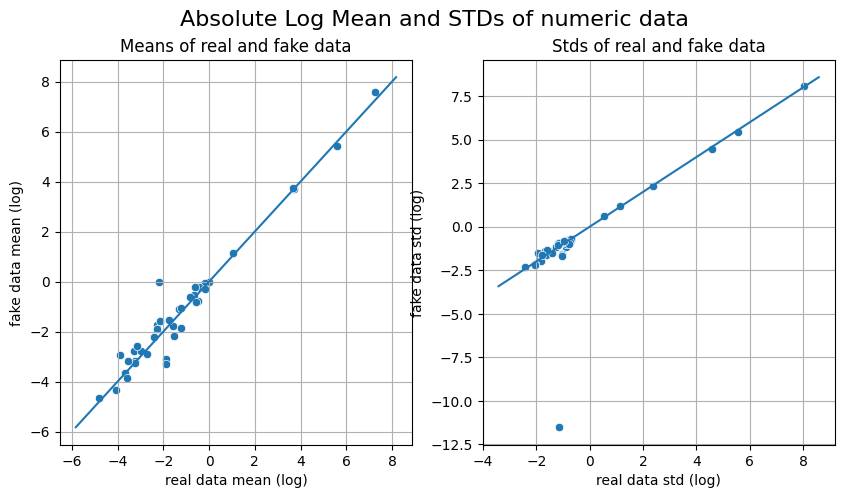

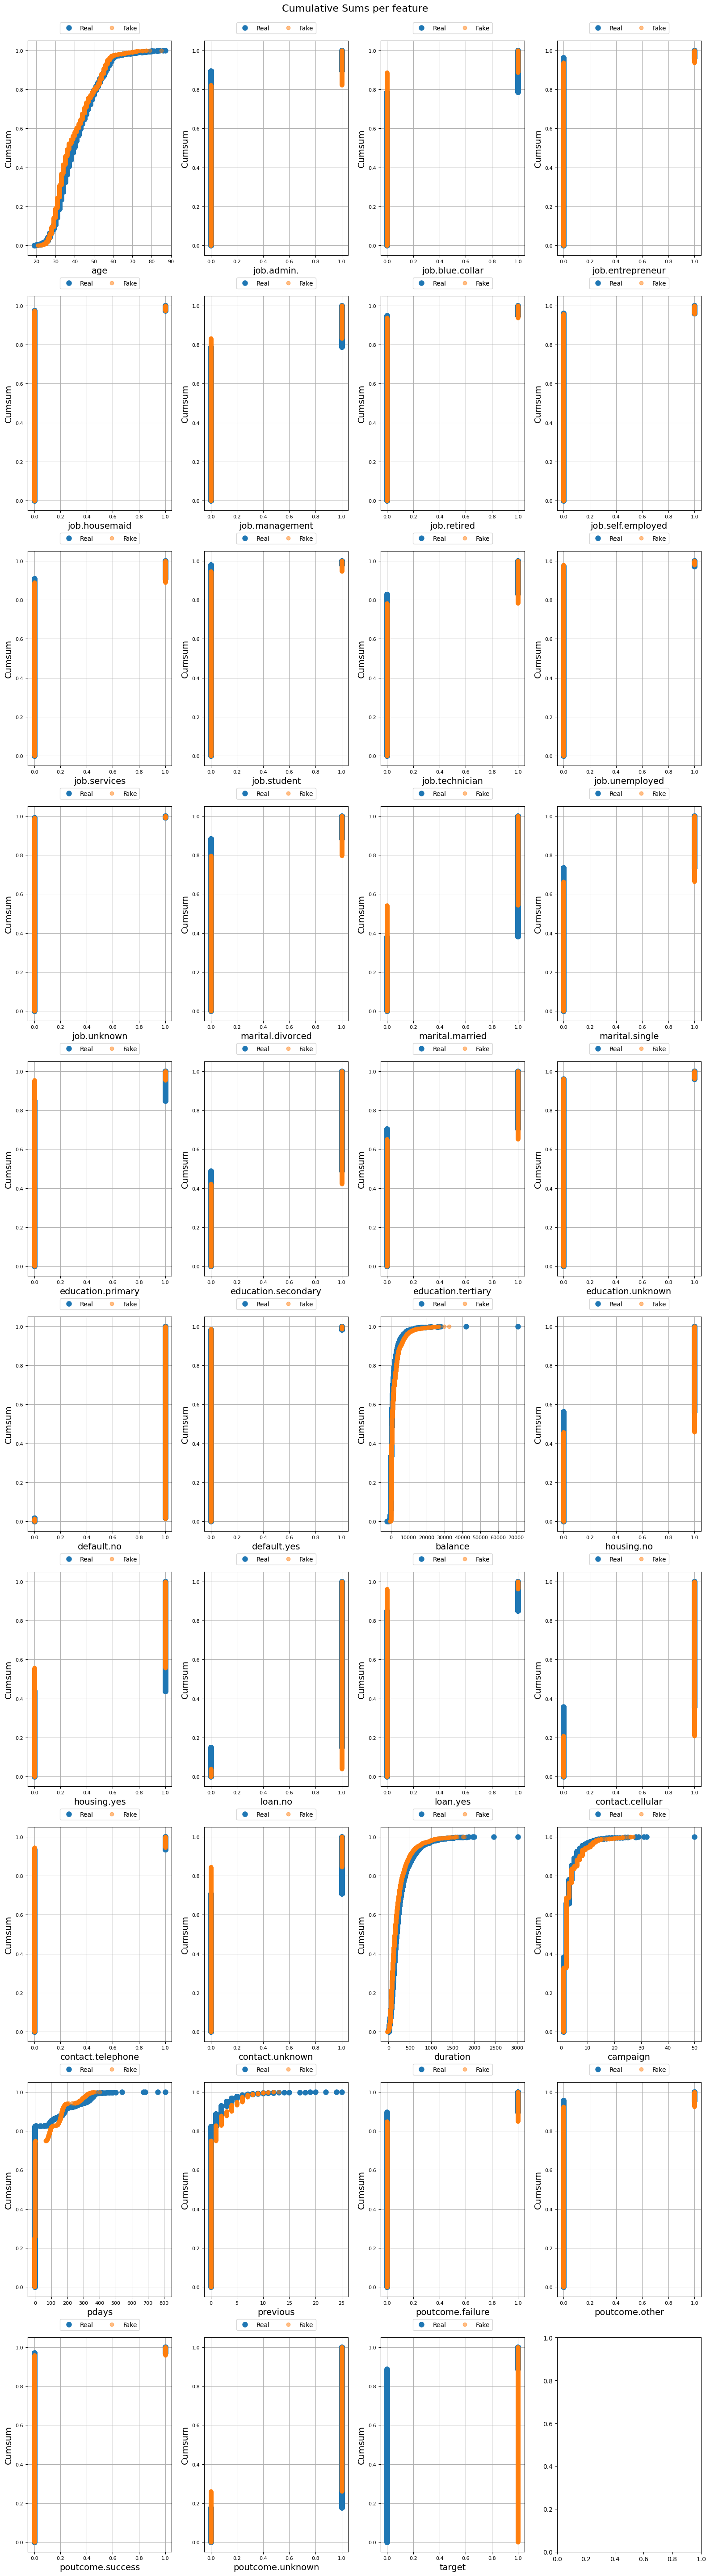

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * s

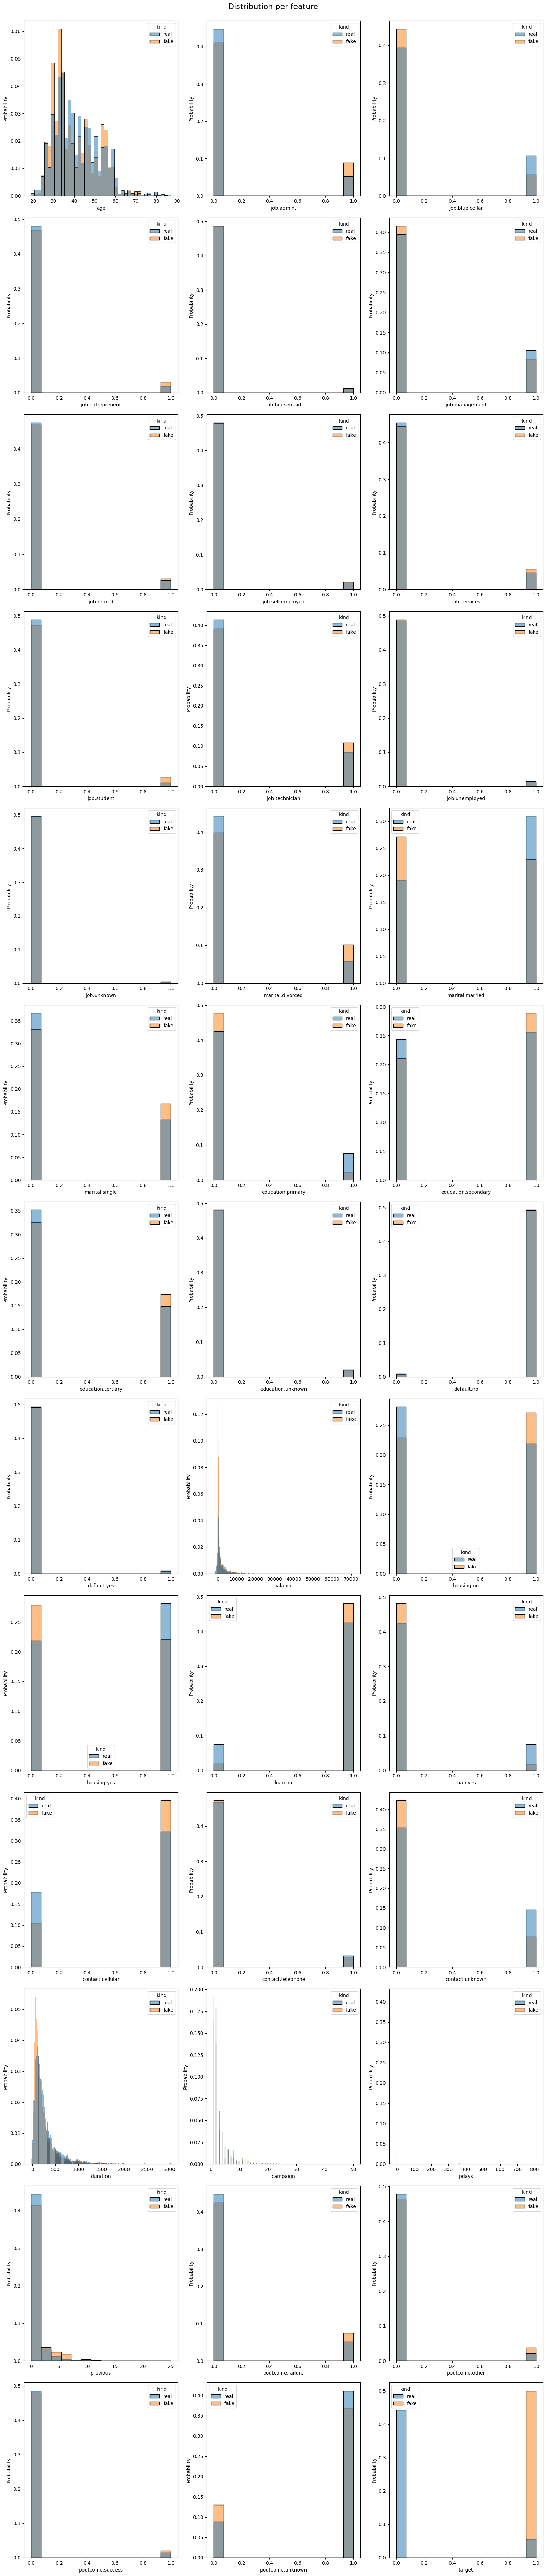

TypeError: ignored

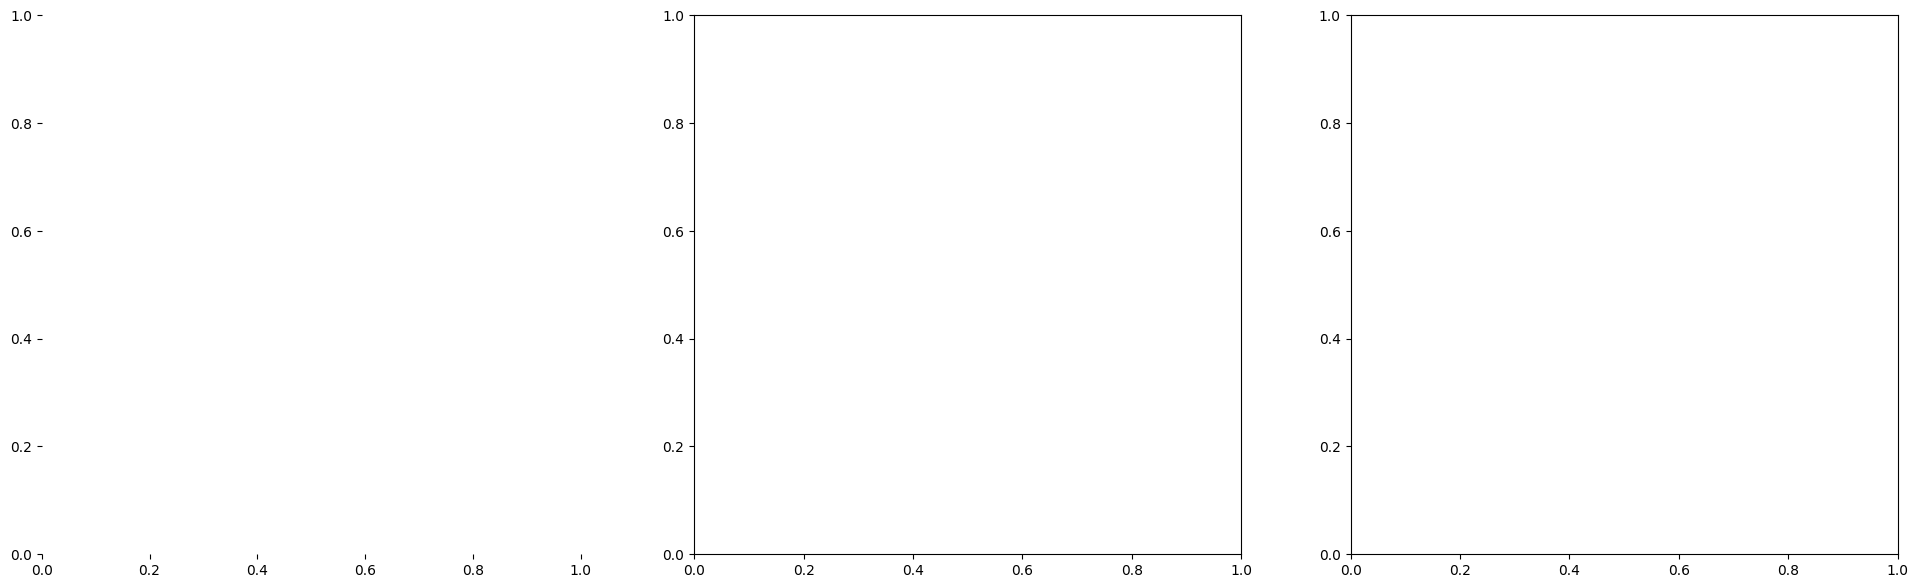

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(dataset, gen_unos_fake)
table_evaluator.visual_evaluation()

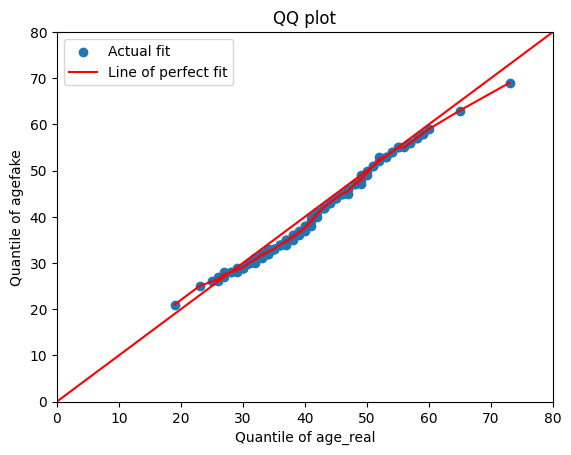

In [ ]:
qqplot(dataset, gen_unos_fake, xlim = [0,80], ylim = [0,80], namecolumn = 'age')

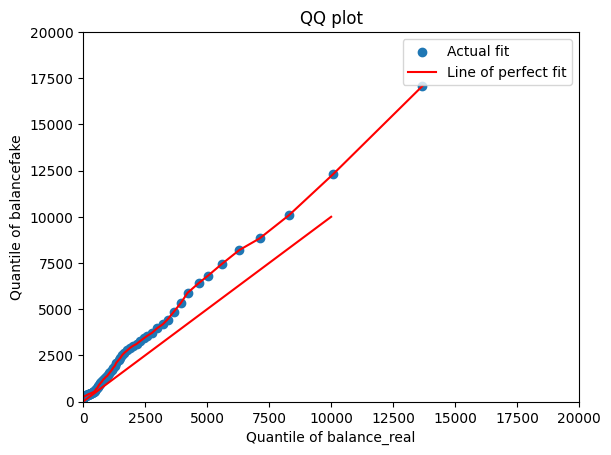

In [ ]:
qqplot(dataset, gen_unos_fake, xlim = [0,20000], ylim = [0,20000], namecolumn = 'balance')

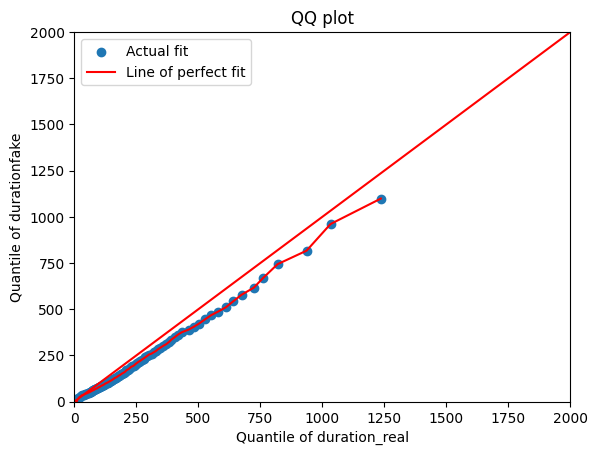

In [ ]:
qqplot(dataset, gen_unos_fake, xlim = [0,2000], ylim = [0,2000], namecolumn = 'duration')

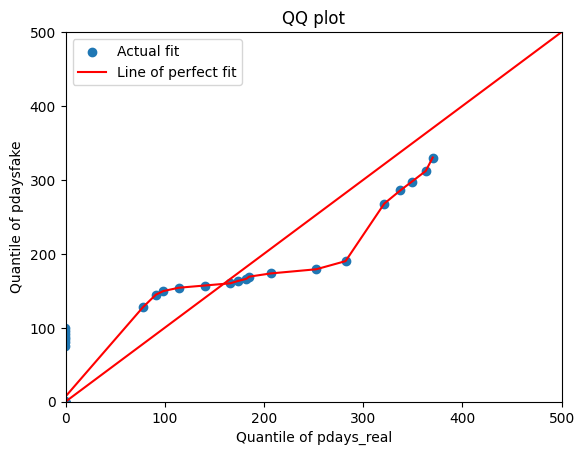

In [ ]:
qqplot(dataset, gen_unos_fake, xlim = [0,500], ylim = [0,500], namecolumn = 'pdays')

In [ ]:
for col in gen_unos_fake.columns:
  print(str(col))
  print()
  print(ks_2samp(dataset[str(col)], gen_unos_fake[str(col)]))

age

KstestResult(statistic=0.09211974306768261, pvalue=1.2839476933208376e-14, statistic_location=35, statistic_sign=-1)
job.admin.

KstestResult(statistic=0.07301554012137157, pvalue=2.4184465867079477e-09, statistic_location=0, statistic_sign=1)
job.blue.collar

KstestResult(statistic=0.1011967510046827, pvalue=1.4880655791971714e-17, statistic_location=0, statistic_sign=-1)
job.entrepreneur

KstestResult(statistic=0.025604752505918697, pvalue=0.15798714191825824, statistic_location=0, statistic_sign=1)
job.housemaid

KstestResult(statistic=0.00015184308942671143, pvalue=1.0, statistic_location=0, statistic_sign=-1)
job.management

KstestResult(statistic=0.0464353497752614, pvalue=0.000489467303119404, statistic_location=0, statistic_sign=-1)
job.retired

KstestResult(statistic=0.011014953599513886, pvalue=0.9714153130197265, statistic_location=0, statistic_sign=1)
job.self.employed

KstestResult(statistic=0.00429405216470162, pvalue=0.9999999999999466, statistic_location=0, statist

In [ ]:
for col in gen_unos_fake.columns:
  print(col)
  print()
  print(calculate_psi(dataset, gen_unos_fake))

age

6.639690179695564
job.admin.

3.868695623245507
job.blue.collar



<ipython-input-170-b0dbe83c2c28>:14: RuntimeWarning: invalid value encountered in divide
  psi = (actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions)
<ipython-input-170-b0dbe83c2c28>:36: RuntimeWarning: divide by zero encountered in log
  psi = (np.array(actual_pct) - np.array(expected_pct)) * np.where(np.log(np.array(actual_pct) / np.array(expected_pct)) > 0, np.log(np.array(actual_pct) / np.array(expected_pct)), 0)


1.2235515729558546
job.entrepreneur

1.3375138157053885
job.housemaid

2.3642821339362643e-06
job.management

0.26562173466420025
job.retired

0.2137836433467299
job.self.employed

0.04427564047607101
job.services

0.33158742949193604
job.student

3.3573600554811263
job.technician

1.1004782113866671
job.unemployed

0.005495957568531026
job.unknown

0.00367967253983027
marital.divorced

4.82806871056953
marital.married

5.588142942732894
marital.single

1.7423593543219118
education.primary

1.2458676162788516
education.secondary

0.8125832288571038
education.tertiary

0.7173796559552542
education.unknown

0.00037200830925170986
default.no

0.0011943886565217697
default.yes

0.002945720589214061
balance

21.10274362744485
housing.no

2.3263786949771705
housing.yes

3.107079264382139
loan.no

1.3473560517653576
loan.yes

1.3823783571771942
contact.cellular

3.0679832786042898
contact.telephone

0.013767579493014468
contact.unknown

2.4867465591995472
duration

15.94795879720509
campaign


#Para el futuro: Condiciones

In [ ]:
#Generate only 0's
cond0 = Condition(
    num_rows=70,
    column_values={'target': 0}
)

In [ ]:
synthetic_bank_cond0 = ctgan.sample_conditions(conditions=[cond0])

Sampling conditions: 100%|██████████| 70/70 [00:00<00:00, 124.53it/s]


In [ ]:
synthetic_bank_cond_30_70 = pd.concat([synthetic_bank_cond0,synthetic_bank_cond1])
synthetic_bank_cond_30_70.head()

age  job.admin.  job.blue.collar  job.entrepreneur  job.housemaid  \
0   42           0                0                 0              0   
1   29           1                1                 0              0   
2   23           0                0                 0              0   
3   19           0                0                 0              0   
4   26           0                0                 0              0   

   job.management  job.retired  job.self.employed  job.services  job.student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               1            0                  0             0            0   
4               0            0                  0             1            0   

   ...  contact.unknown  duration  campaign  pdays  previous  \
0  ...                0       155         1     -1         0   
1  ...                0       127         2      3         0   
2  ...                0       351         3     -1         0   
3  ...                0       131         1     -1         0   
4  ...                1       230         1      2         0   

   poutcome.failure  poutcome.other  poutcome.success  poutcome.unknown  \
0                 0               0                 0                 1   
1                 0               0                 0                 1   
2                 0               0                 0                 1   
3                 0               0                 0                 1   
4                 0               0                 0                 1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 39 columns]

In [ ]:
#Save conditioned dataset
#synthetic_bank_cond_30_70.to_csv('synthetic_data_bank.csv', index = False)

IPython not installed.


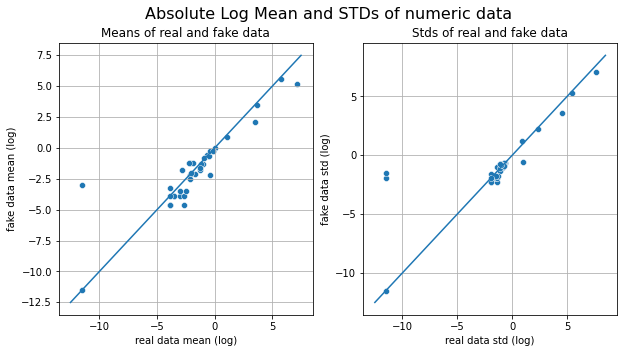

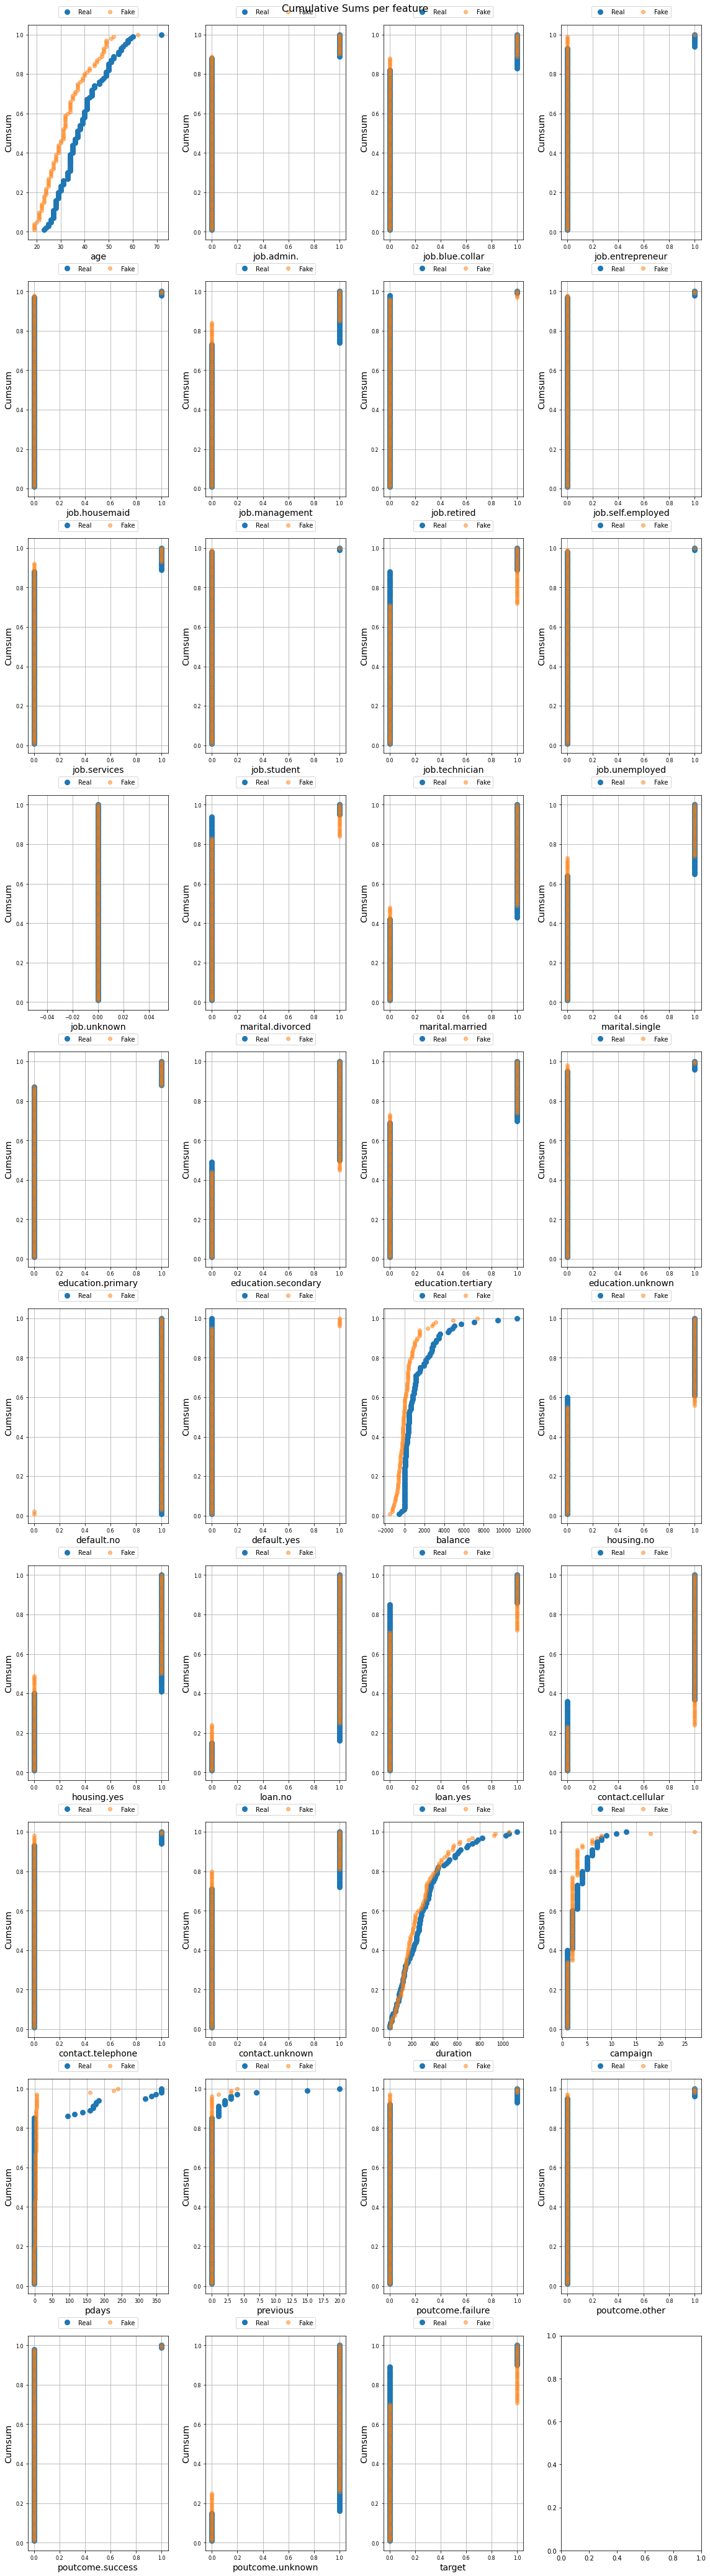

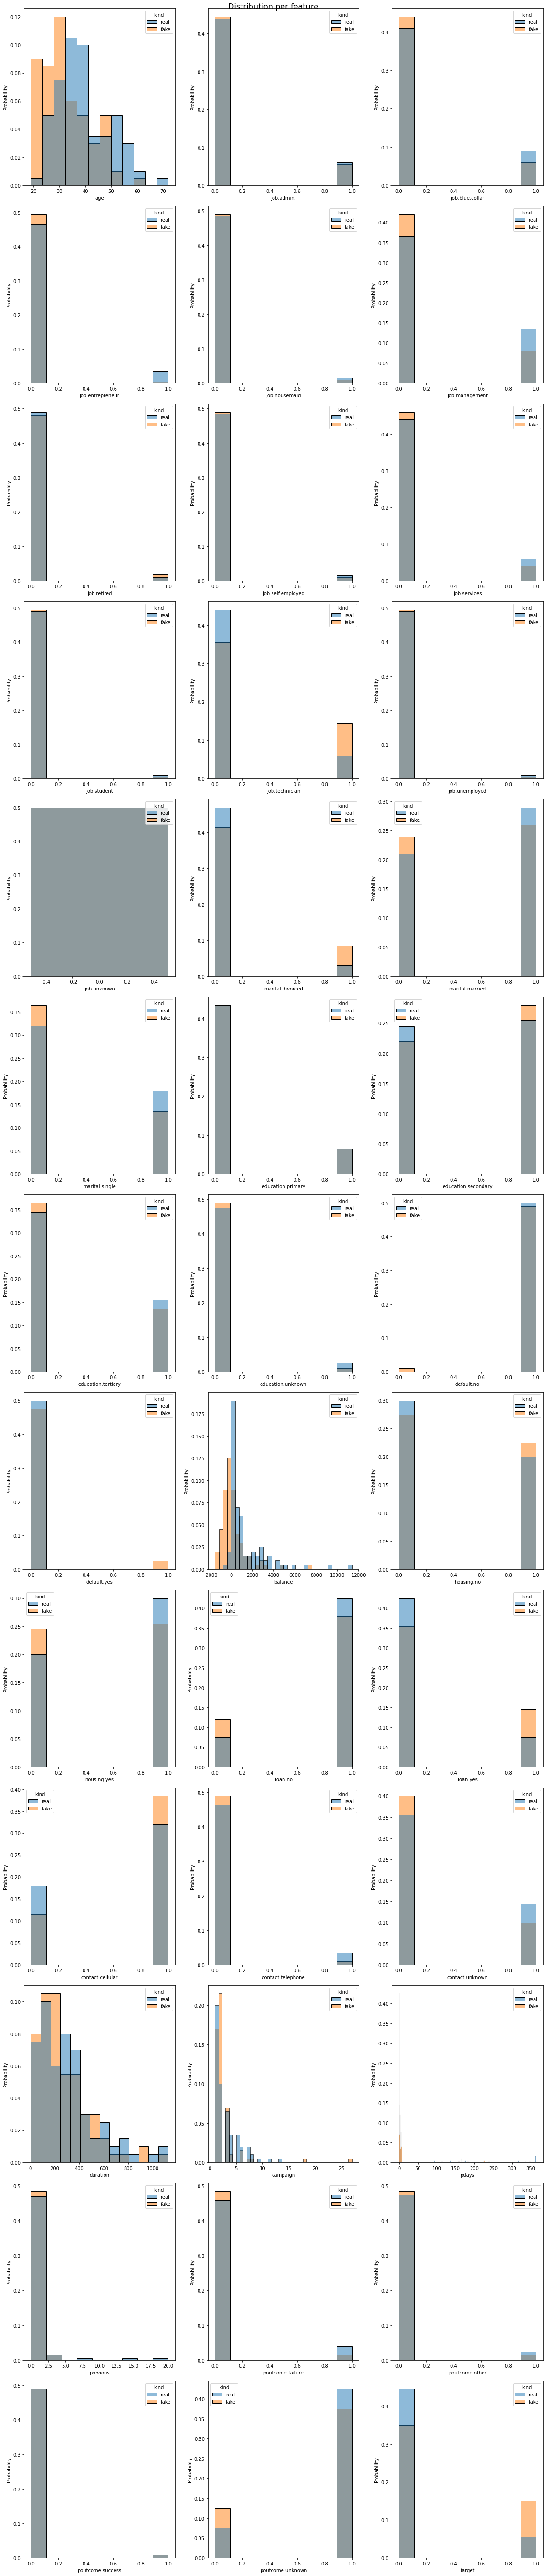

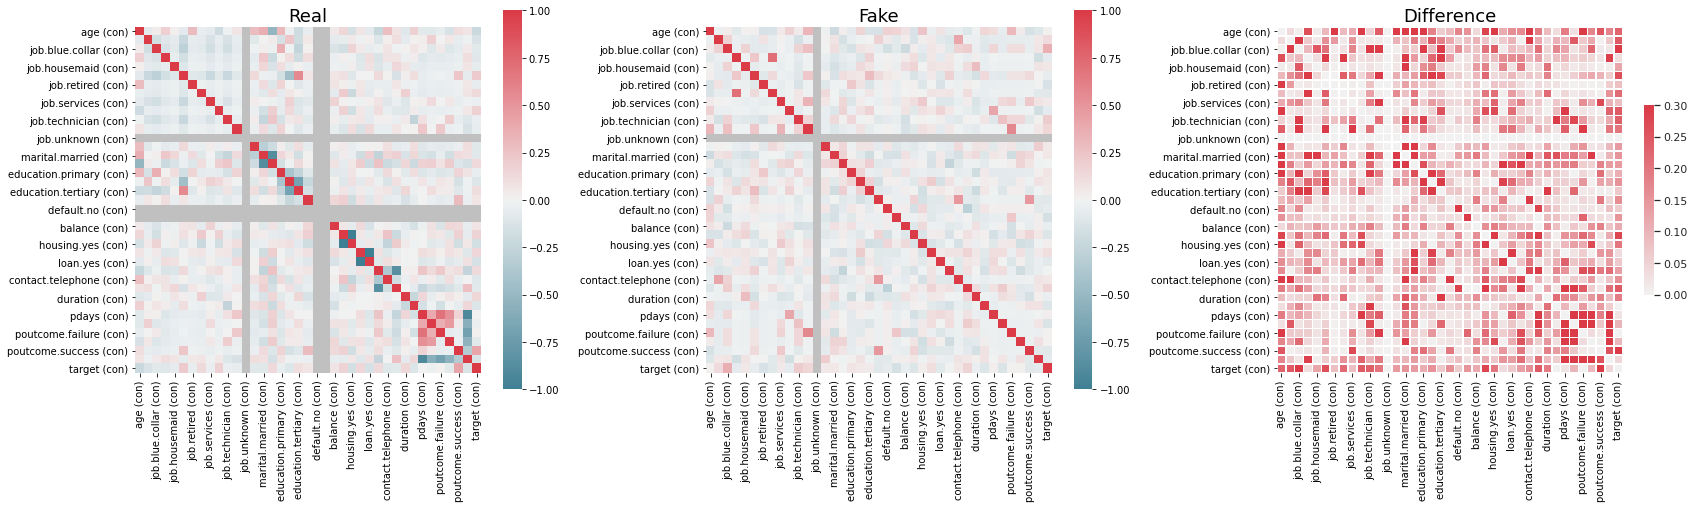

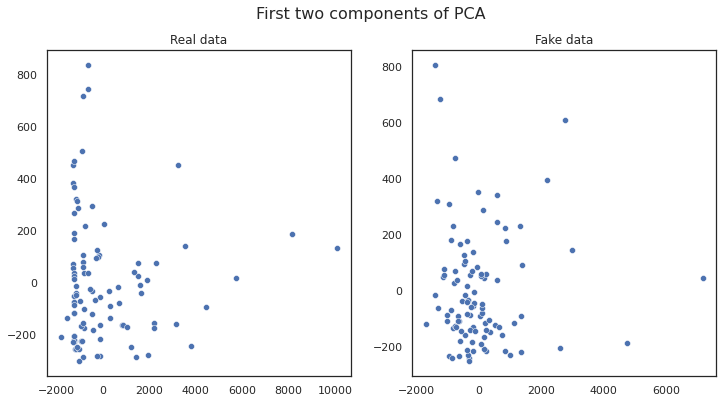

In [ ]:
#Visualize and assess
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(dataset, synthetic_bank_cond_30_70)
table_evaluator.visual_evaluation()

In [ ]:
!pip install statsmodels
!pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
#Age QQplot
age_r = dataset.loc[:, 'age'].values
age_f = synthetic_bank_cond_30_70.loc[:, 'age'].values

df_pct = pd.DataFrame()
df_pct['age_real'] = np.percentile(age_r, range(100))
df_pct['age_fake'] = np.percentile(age_f, range(100))

Text(0.5, 1.0, 'QQ plot')

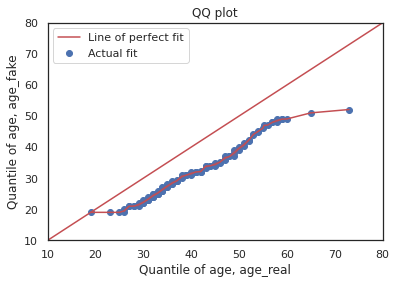

In [ ]:
#plt(figsize=(8, 8))
plt.scatter(x='age_real', y='age_fake', data=df_pct, label='Actual fit')
sns.lineplot(x='age_real', y='age_fake', data=df_pct, color='r', label='Line of perfect fit')
sns.lineplot(x=[0,2000], y=[0,2000], color='r')
plt.xlabel('Quantile of age, age_real')
plt.ylabel('Quantile of age, age_fake')
plt.xlim(10,80)
plt.ylim(10,80)
plt.legend()
plt.title("QQ plot")

In [ ]:
#balance QQplot
age_r = dataset.loc[:, 'balance'].values
age_f = synthetic_bank_cond_30_70.loc[:, 'balance'].values

df_pct = pd.DataFrame()
df_pct['balance_real'] = np.percentile(age_r, range(100))
df_pct['balance_fake'] = np.percentile(age_f, range(100))

Text(0.5, 1.0, 'QQ plot')

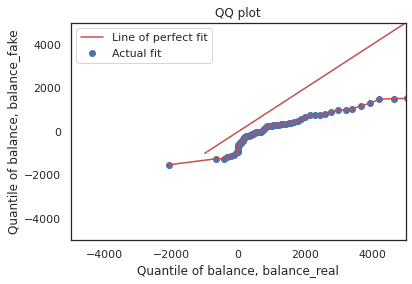

In [ ]:
#plt(figsize=(8, 8))
plt.scatter(x='balance_real', y='balance_fake', data=df_pct, label='Actual fit')
sns.lineplot(x='balance_real', y='balance_fake', data=df_pct, color='r', label='Line of perfect fit')
sns.lineplot(x=[-1000,20000], y=[-1000,20000], color='r')
plt.xlabel('Quantile of balance, balance_real')
plt.ylabel('Quantile of balance, balance_fake')
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)
plt.legend()
plt.title("QQ plot")

In [ ]:
#duration QQplot
age_r = dataset.loc[:, 'duration'].values
age_f = synthetic_bank_cond_30_70.loc[:, 'duration'].values

df_pct = pd.DataFrame()
df_pct['duration_real'] = np.percentile(age_r, range(100))
df_pct['duration_fake'] = np.percentile(age_f, range(100))

Text(0.5, 1.0, 'QQ plot')

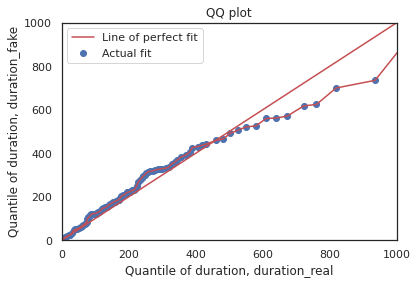

In [ ]:
#plt(figsize=(8, 8))
plt.scatter(x='duration_real', y='duration_fake', data=df_pct, label='Actual fit')
sns.lineplot(x='duration_real', y='duration_fake', data=df_pct, color='r', label='Line of perfect fit')
sns.lineplot(x=[0,2000], y=[0,2000], color='r')
plt.xlabel('Quantile of duration, duration_real')
plt.ylabel('Quantile of duration, duration_fake')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.legend()
plt.title("QQ plot")

In [ ]:
k = np.argmax( np.abs(dataset['age'] - synthetic_dataset['age']))
ks_stat = np.abs(df_ks['F_treatment'][k] - df_ks['F_control'][k])

y = (df_ks['F_treatment'][k] + df_ks['F_control'][k])/2
plt.plot('Income', 'F_control', data=df_ks, label='Control')
plt.plot('Income', 'F_treatment', data=df_ks, label='Treatment')
plt.errorbar(x=df_ks['Income'][k], y=y, yerr=ks_stat/2, color='k'
             capsize=5, mew=3, label=f"Test statistic: {ks_stat:.4f}")
plt.legend(loc='center right')
plt.title("Kolmogorov-Smirnov Test")